# Hyperz SED Fitting Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = r'/home/chris/Documents/ZPHOT1.3/src/'

In [3]:
# small subset of larger catalogue which was used in hyperz for
# time efficiency.
df = pd.read_csv('full_subset_good.csv', index_col=0)
df.head()

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
280716   0.49  3.000  0.5897  33.4474  28.8046  26.6278  24.6965  45.1824   
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
275850   5.92  0.200  0.7505  57.3560  49.6766  47.9754  44.8024  80.1492   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
280716   40.7217  36.3800  ...   23.5277    23.5407  1.000000e+10  0.0  1.0   
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
275850   73.5150  65.4574  ...   42.4660    42.4892  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
280716       1.0     1.0  2.0   5.106113      True  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
275850       1.0     1.0  2.0  12.828409      True  

[5 rows x 48 columns]

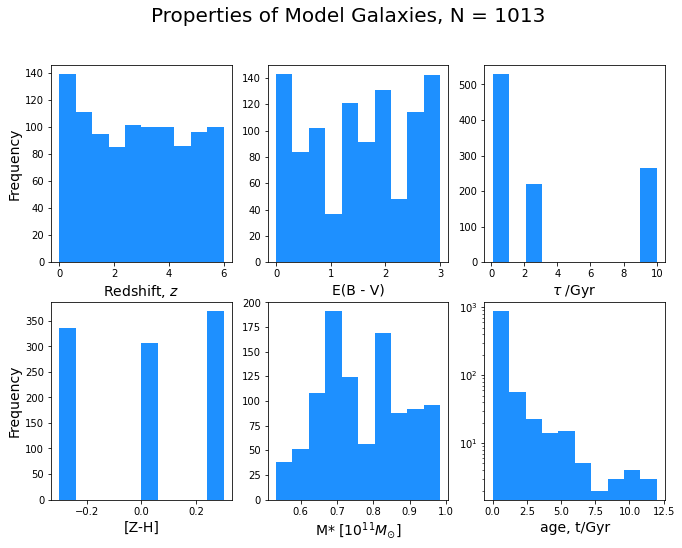

In [4]:
gal_params = ('z', 'Av', 'tau/Gyr', 'Z', 'M*', 't/Gyr')
units_params = (r'Redshift, $z$', 'E(B - V)',
                r'$\tau$ /Gyr', '[Z-H]',
                r'M* [$10^{11} M_{\odot}$]', 'age, t/Gyr')

plt.figure(figsize=(11, 8))
plt.suptitle('Properties of Model Galaxies, N = %i' % len(df),
             fontsize=20)

for i in range(0, 6):
    log = False
    plt.subplot(231+i)
    
    if i == 0 or i == 3 : plt.ylabel('Frequency', fontsize=14)
    plt.xlabel(units_params[i], fontsize=14)
    
    if i == 5 : log = True
    plt.hist(df[gal_params[i]], color='dodgerblue', log=log)

# Results

In [5]:
all_zphot = np.loadtxt(path + 'new_ugrizVisYJH_results/ugrizVisYJH_hz.z_phot')

YJH_zphot = np.loadtxt(path + 'new_YJH_results/YJH_hz.z_phot')

grizVisYJH_zphot = np.loadtxt(path + 'new_grizVisYJH_results/grizVisYJH_hz.z_phot')

ugrizYJH_zphot = np.loadtxt(path + 'new_ugrizYJH_results/ugrizYJH_hz.z_phot')

ugriz_zphot = np.loadtxt(path + 'new_ugriz_results/ugriz_hz.z_phot')

VisYJH_zphot = np.loadtxt(path + 'new_VisYJH_results/VisYJH_hz.z_phot')

In [26]:
titleCmap = 'Av'
varCmap = df[titleCmap]

In [81]:
filterset_list = (r'ugriz $VIS$ YJH',
               r'griz $VIS$ YJH',
               'YJH',
               'ugriz',
               'ugriz YJH',
               r'$VIS$ YJH')

zphot_3d    = np.dstack([all_zphot, 
                         grizVisYJH_zphot,
                         YJH_zphot,
                         ugriz_zphot,
                         ugrizYJH_zphot,
                         VisYJH_zphot])
print(zphot_3d.shape)

(1013, 21, 6)


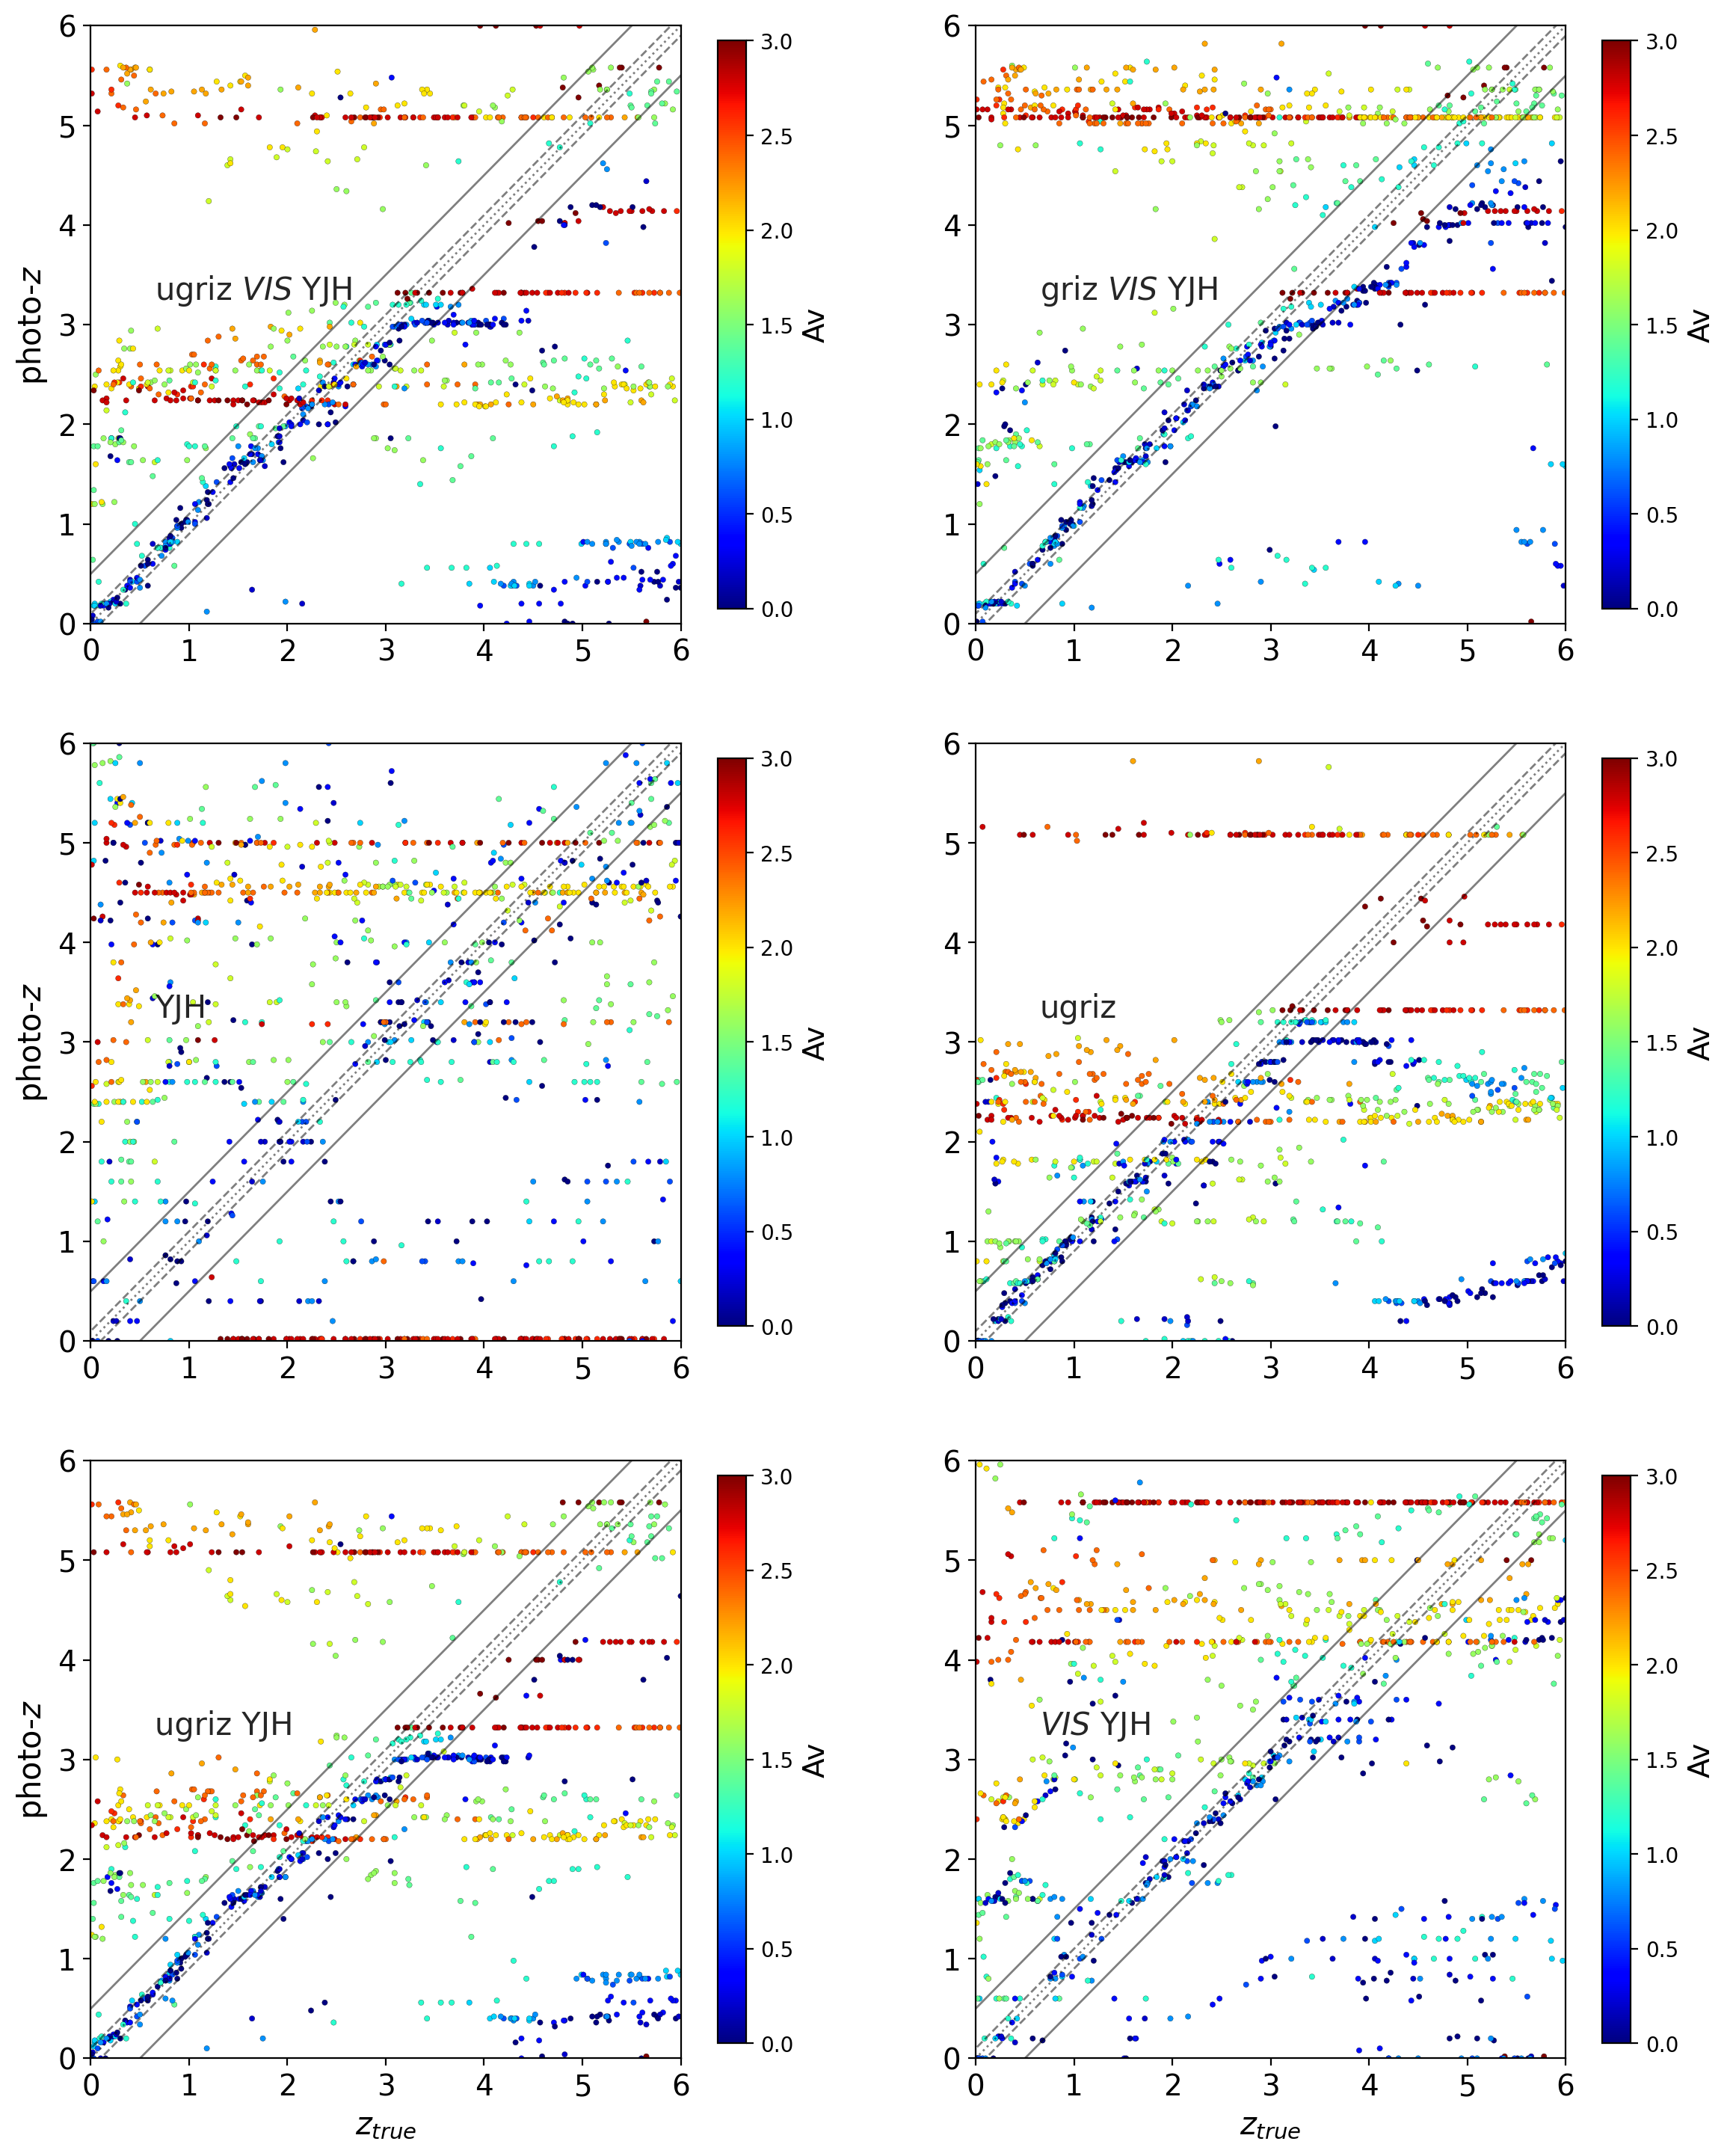

In [82]:

plt.figure(figsize= (14, 18))
for i in range(0, 6):
    plt.subplot(321+i)
    

    plt.plot([-6., 9.5], [-5.5, 10.],'k', alpha=0.5, lw=1)
    plt.plot([-6., 9.9], [-5.9, 10.],'k--', alpha=0.5, ls='--', lw=1)
    plt.plot([-6., 10.], [-6, 10.], ':k', alpha=0.5, ls=':', lw=1)
    plt.plot([-6., 10.1], [-6.1, 10.],'k--', alpha=0.5, ls='--', lw=1)
    plt.plot([-6., 10.5], [-6.5, 10.],'k', alpha=0.5, lw=1)
    
    plt.scatter(df['z'], zphot_3d[:, 1, i], s=7, c=varCmap, cmap='jet', edgecolors='k', lw=0.1)
    cbar = plt.colorbar(shrink=0.95)
    cbar.set_label(titleCmap, fontsize=14)
    plt.text(0.65, 3.25, (filterset_list[i]), c='k', fontsize=15, alpha=0.85, )

    if (i % 2) == 0 : plt.ylabel((r'photo-$z$'),
                                 fontsize=15)
    if i >= 4 : plt.xlabel((r'$z_{true}$'),
                              fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 6)
    plt.xlim(0, 6)
plt.show()


### w/o cmap

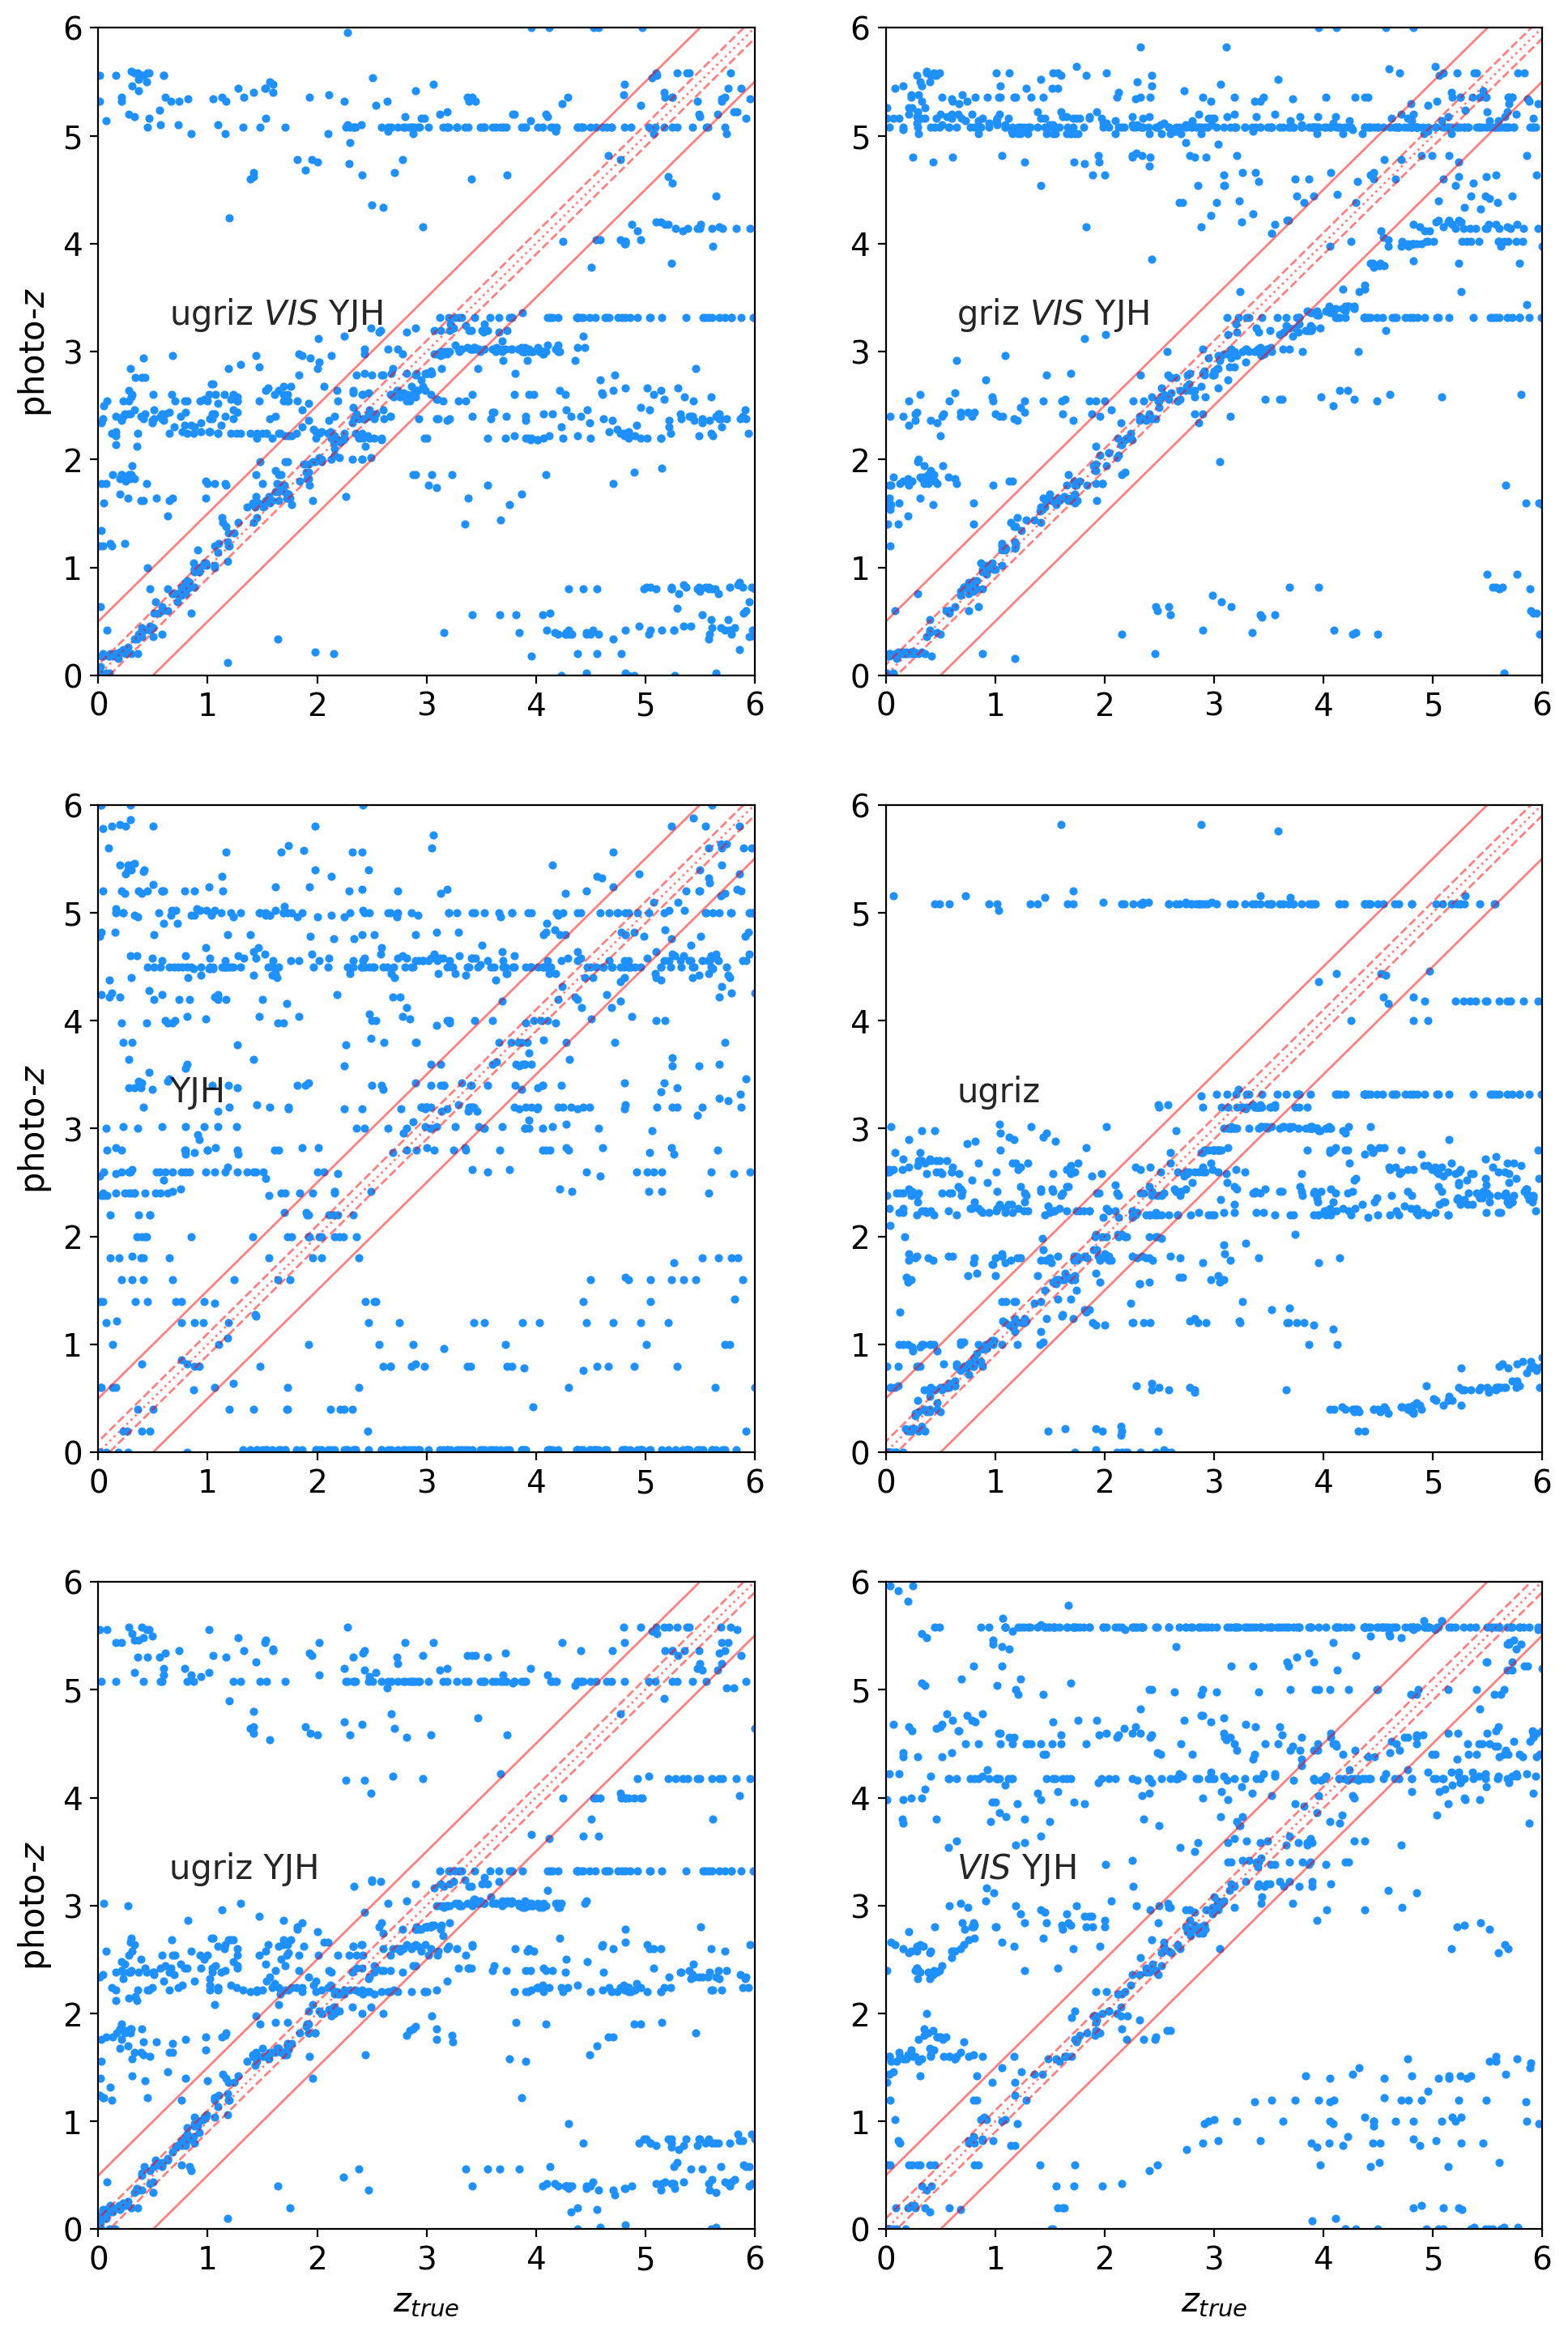

In [87]:

plt.figure(figsize= (11.5, 18))
for i in range(0, 6):
    plt.subplot(321+i)
    

    plt.plot([-6., 9.5], [-5.5, 10.],'r', alpha=0.5, lw=1)
    plt.plot([-6., 9.9], [-5.9, 10.],'r--', alpha=0.5, ls='--', lw=1)
    plt.plot([-6., 10.], [-6, 10.], ':r', alpha=0.5, ls=':', lw=1)
    plt.plot([-6., 10.1], [-6.1, 10.],'r--', alpha=0.5, ls='--', lw=1)
    plt.plot([-6., 10.5], [-6.5, 10.],'r', alpha=0.5, lw=1)
    
    plt.scatter(df['z'], zphot_3d[:, 1, i], s=7, c='dodgerblue')
    plt.text(0.65, 3.25, (filterset_list[i]), c='k', fontsize=15, alpha=0.85, )

    if (i % 2) == 0 : plt.ylabel((r'photo-$z$'),
                                 fontsize=15)
    if i >= 4 : plt.xlabel((r'$z_{true}$'),
                              fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(0, 6)
    plt.xlim(0, 6)
plt.show()


(0.0, 6.0)

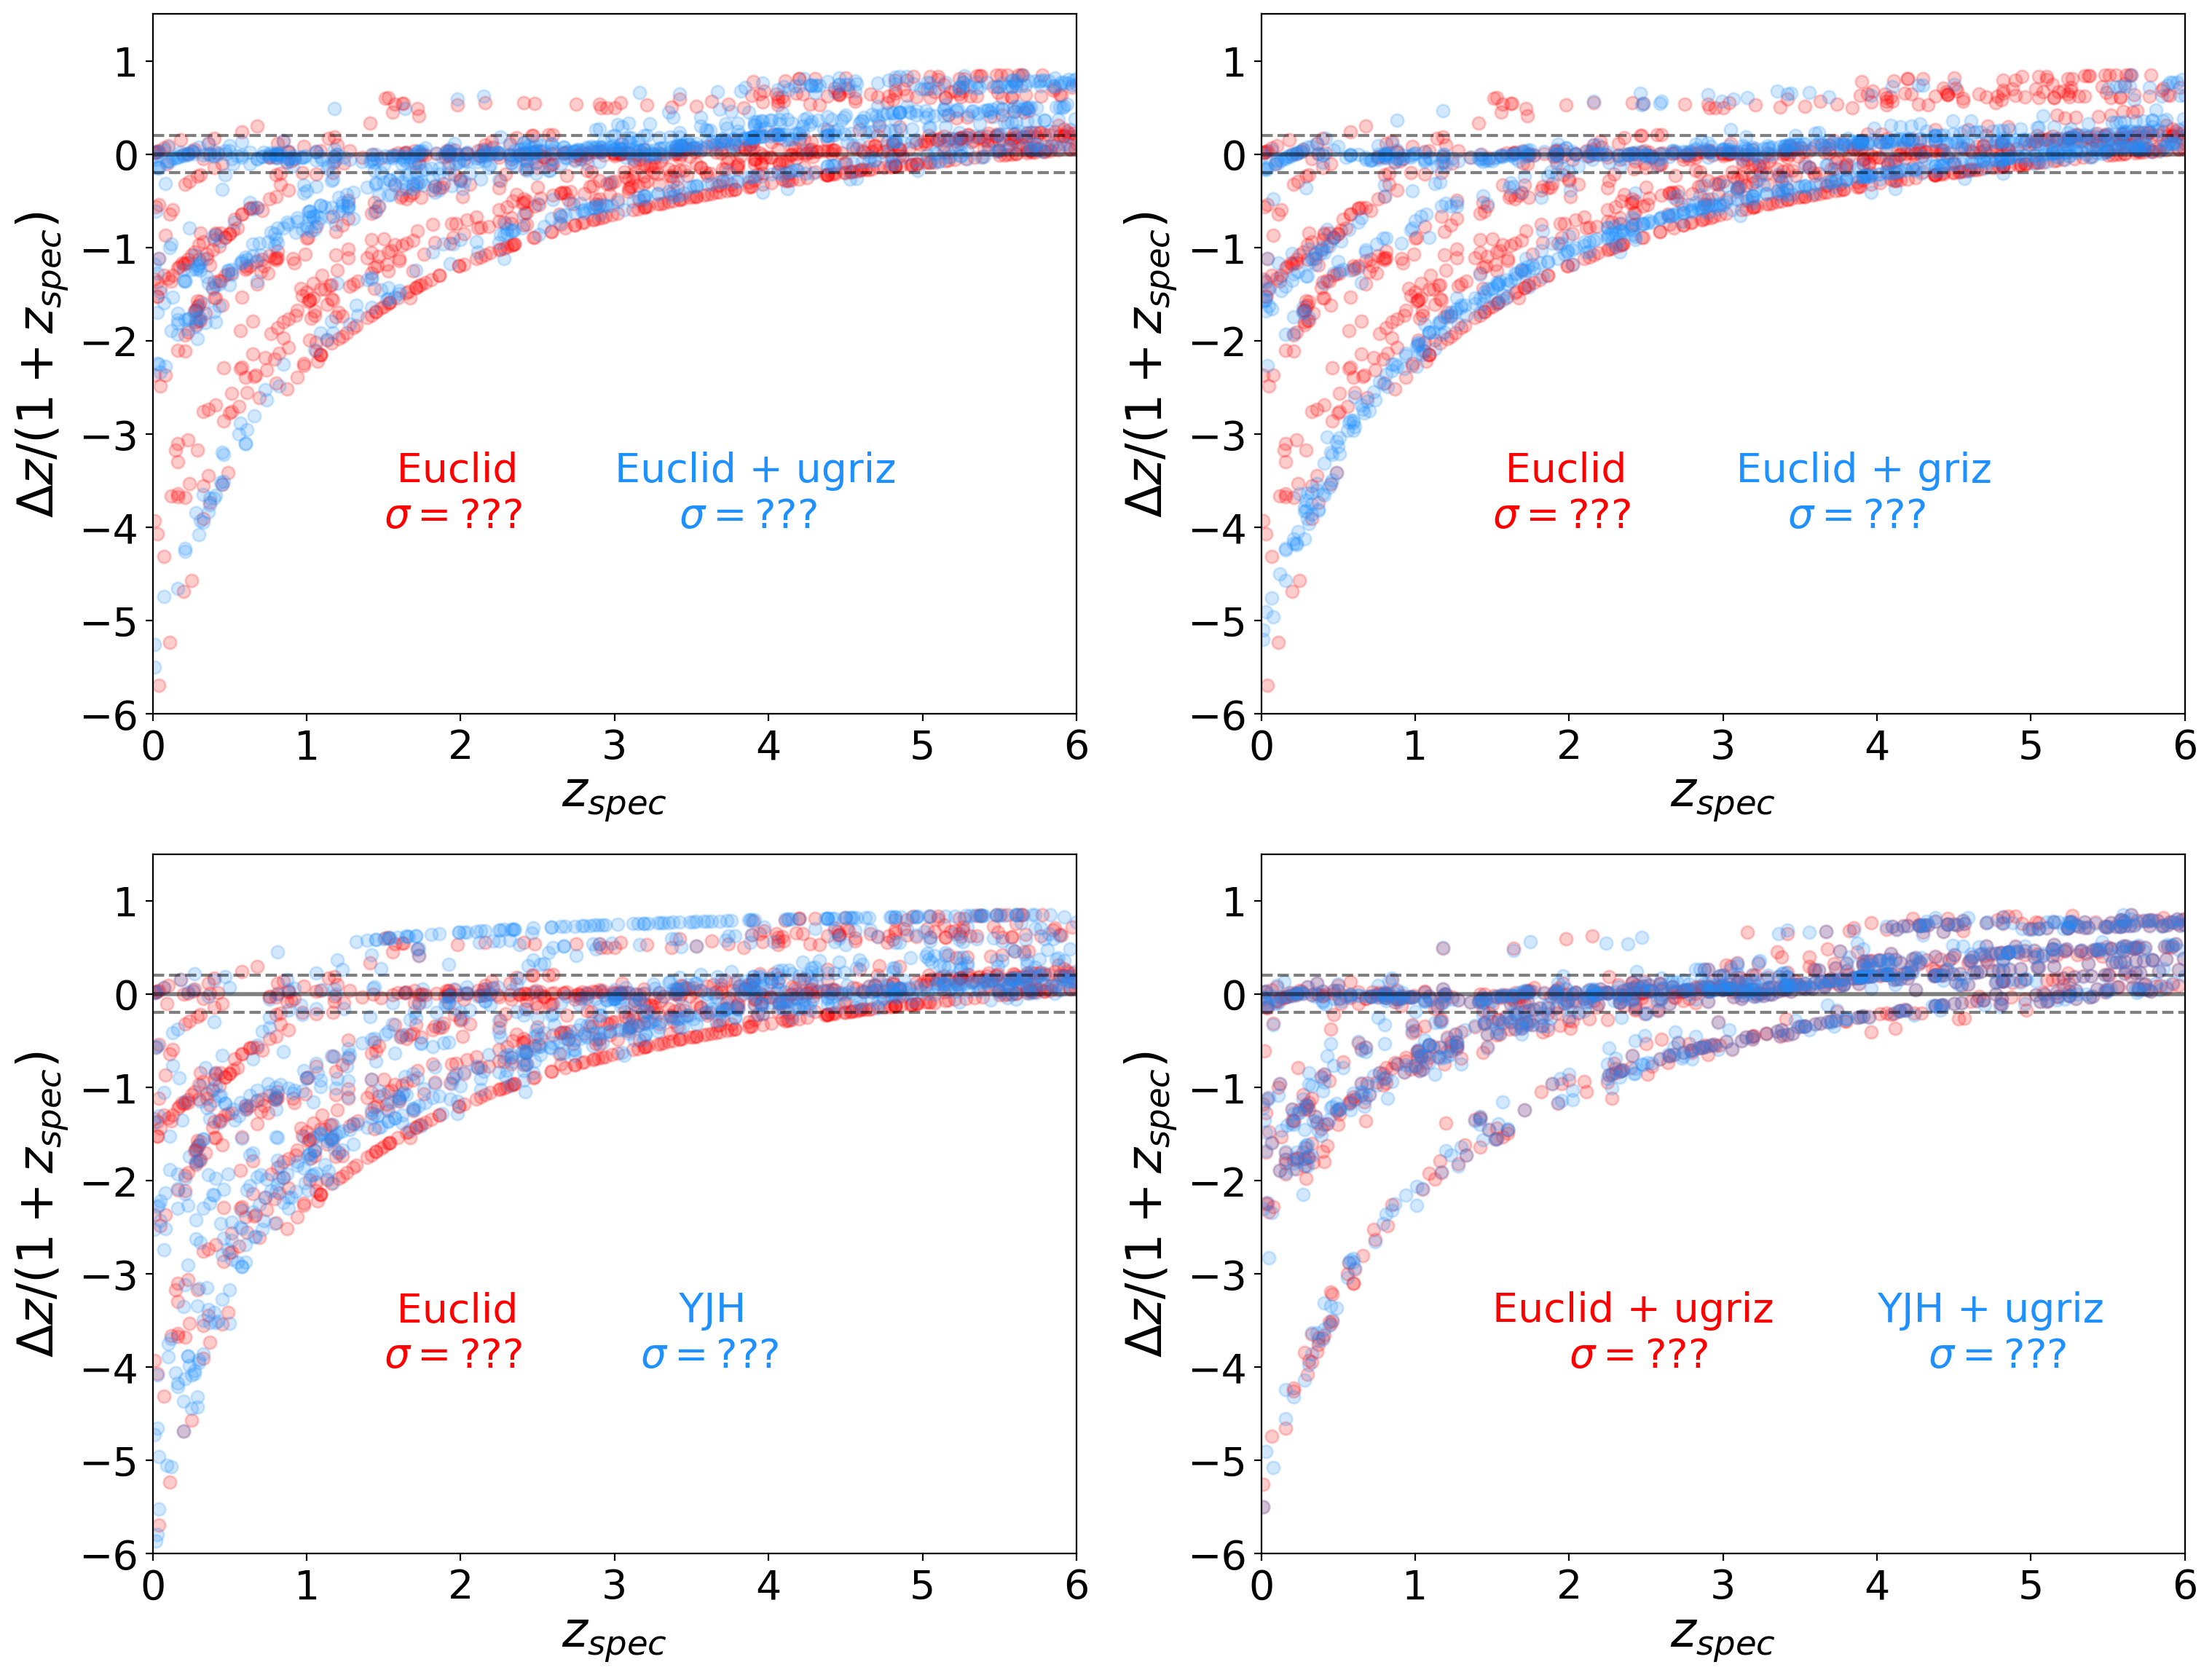

In [88]:
plt.figure(figsize=(18, 14))
plt.subplot(221)
plt.scatter(df['z'], (df['z']-VisYJH_zphot[:, 1])/(1+df['z']), s=40,
            c='r',#df[titleCmap],
            alpha=0.2, label='Euclid'
           )
plt.scatter(df['z'], (df['z']-all_zphot[:, 1])/(1+df['z']), s=40,
            c='dodgerblue',#df[titleCmap],
            alpha=0.2, label='Ground-based + Euclid'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(3, -4, 'Euclid + ugriz\n     $\sigma = ???$', c='dodgerblue', fontsize=20)

plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

plt.subplot(222)
plt.scatter(df['z'], (df['z']-VisYJH_zphot[:, 1])/(1+df['z']), s=40,
            c='r',#df[titleCmap],
            alpha=0.2, label='Euclid'
           )
plt.scatter(df['z'], (df['z']-grizVisYJH_zphot[:, 1])/(1+df['z']), s=40,
            c='dodgerblue',#df[titleCmap],
            alpha=0.2, label='Ground-based + Euclid'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(3, -4, ' Euclid + griz\n     $\sigma = ???$', c='dodgerblue', fontsize=20)

plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

plt.subplot(223)
plt.scatter(df['z'], (df['z']-VisYJH_zphot[:, 1])/(1+df['z']), s=40,
            c='r',#df[titleCmap],
            alpha=0.2, label='Euclid'
           )
plt.scatter(df['z'], (df['z']-YJH_zphot[:, 1])/(1+df['z']), s=40,
            c='dodgerblue',#df[titleCmap],
            alpha=0.2, label='Ground-based + Euclid'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(3, -4, '     YJH\n  $\sigma = ???$', c='dodgerblue', fontsize=20)

plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

plt.subplot(224)
plt.scatter(df['z'], (df['z']-all_zphot[:, 1])/(1+df['z']), s=40,
            c='r',#df[titleCmap],
            alpha=0.2, label='Euclid'
           )
plt.scatter(df['z'], (df['z']-ugrizYJH_zphot[:, 1])/(1+df['z']), s=40,
            c='dodgerblue',#df[titleCmap],
            alpha=0.2, label='Ground-based + Euclid'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

plt.text(1.5, -4, 'Euclid + ugriz\n      $\sigma = ???$', c='r', fontsize=20)
plt.text(4, -4, 'YJH + ugriz\n    $\sigma = ???$', c='dodgerblue', fontsize=20)

plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

#plt.savefig('new_model_figs/photo_zfiltersplot.png', dpi=200, transparent=False, format='png')

In [89]:
titleCmap = 'Av'

In [90]:
mycolor = df[titleCmap]

(0.0, 6.0)

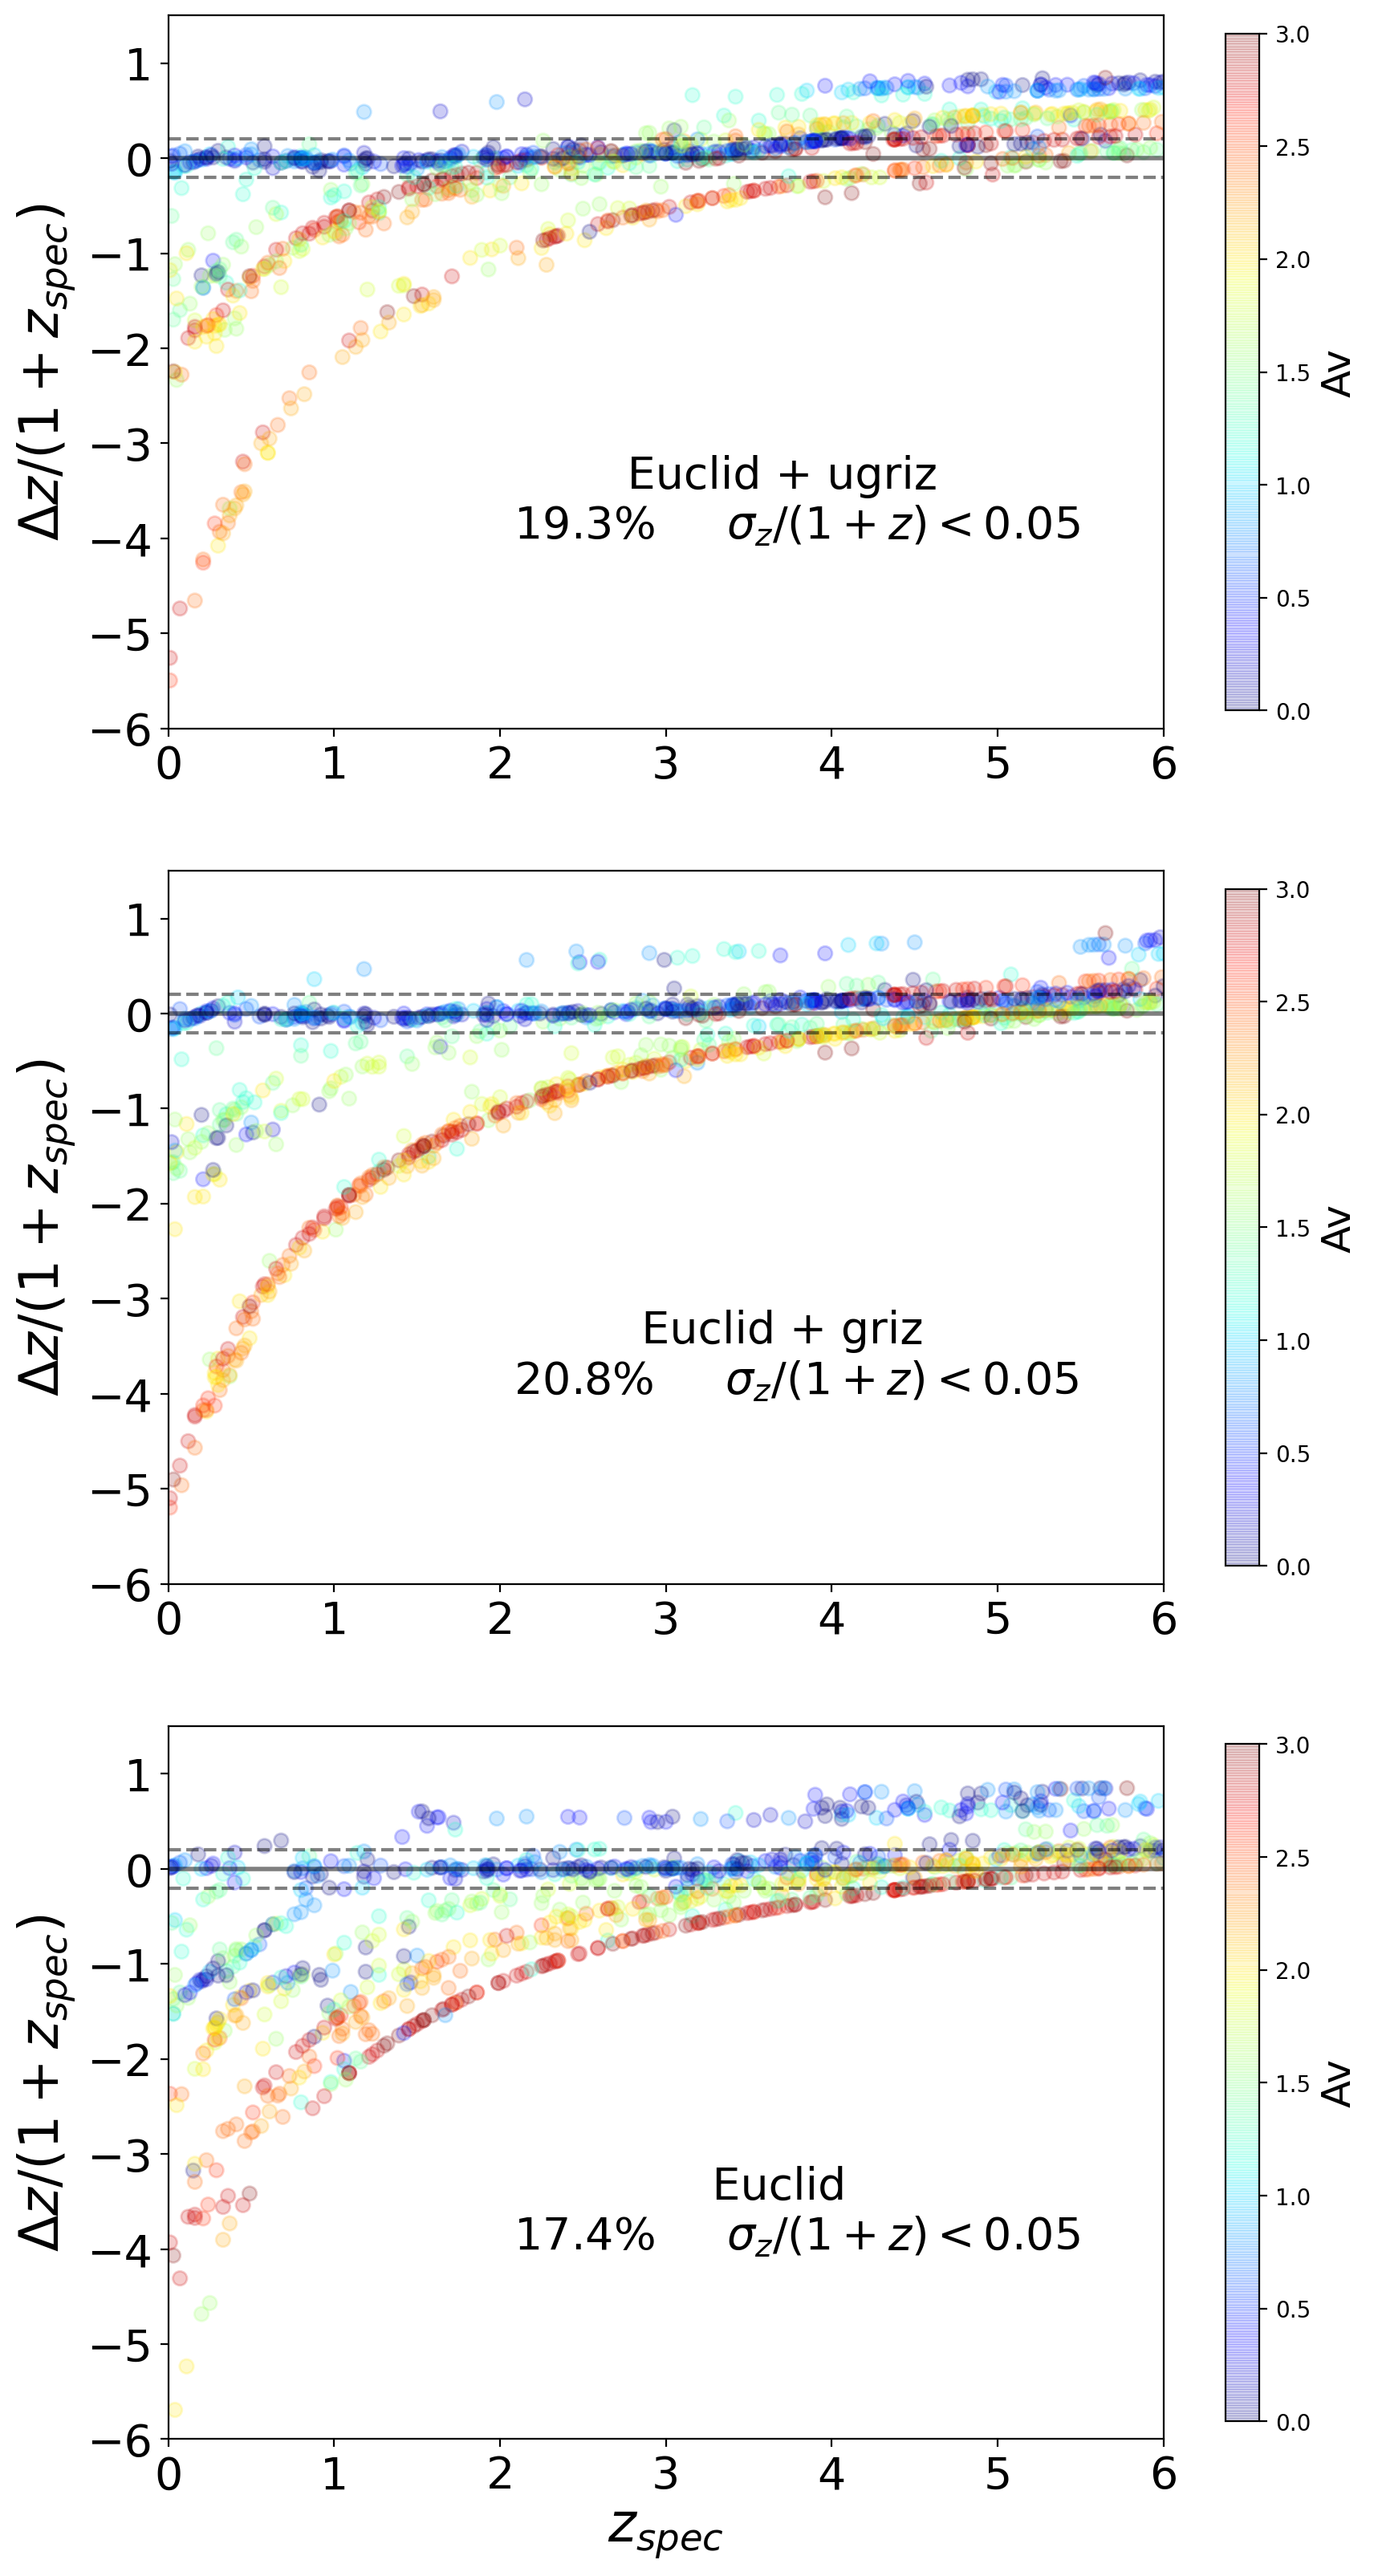

In [91]:
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.scatter(df['z'], (df['z']-all_zphot[:, 1])/(1+df['z']), s=40,
            c=mycolor,
            alpha=0.2,
            cmap='jet'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(2, -4, '         Euclid + ugriz \n 19.3%     $\sigma_z/(1 + z) < 0.05$', c='k', fontsize=20)

#plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

plt.subplot(312)

plt.scatter(df['z'], (df['z']-grizVisYJH_zphot[:, 1])/(1+df['z']), s=40,
            c=mycolor,
            alpha=0.2,
            cmap='jet'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(2, -4, '          Euclid + griz \n 20.8%     $\sigma_z/(1 + z) < 0.05$', c='k', fontsize=20)

#plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)


plt.subplot(313)

plt.scatter(df['z'], (df['z']-VisYJH_zphot[:, 1])/(1+df['z']), s=40,
            c=mycolor,
            alpha=0.2, 
            cmap='jet'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(2, -4, '               Euclid \n 17.4%     $\sigma_z/(1 + z) < 0.05$', c='k', fontsize=20)

plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

#plt.savefig('new_model_figs/photoz_Av_alt.png', transparent=False, dpi=200, format='png')

(0.0, 6.0)

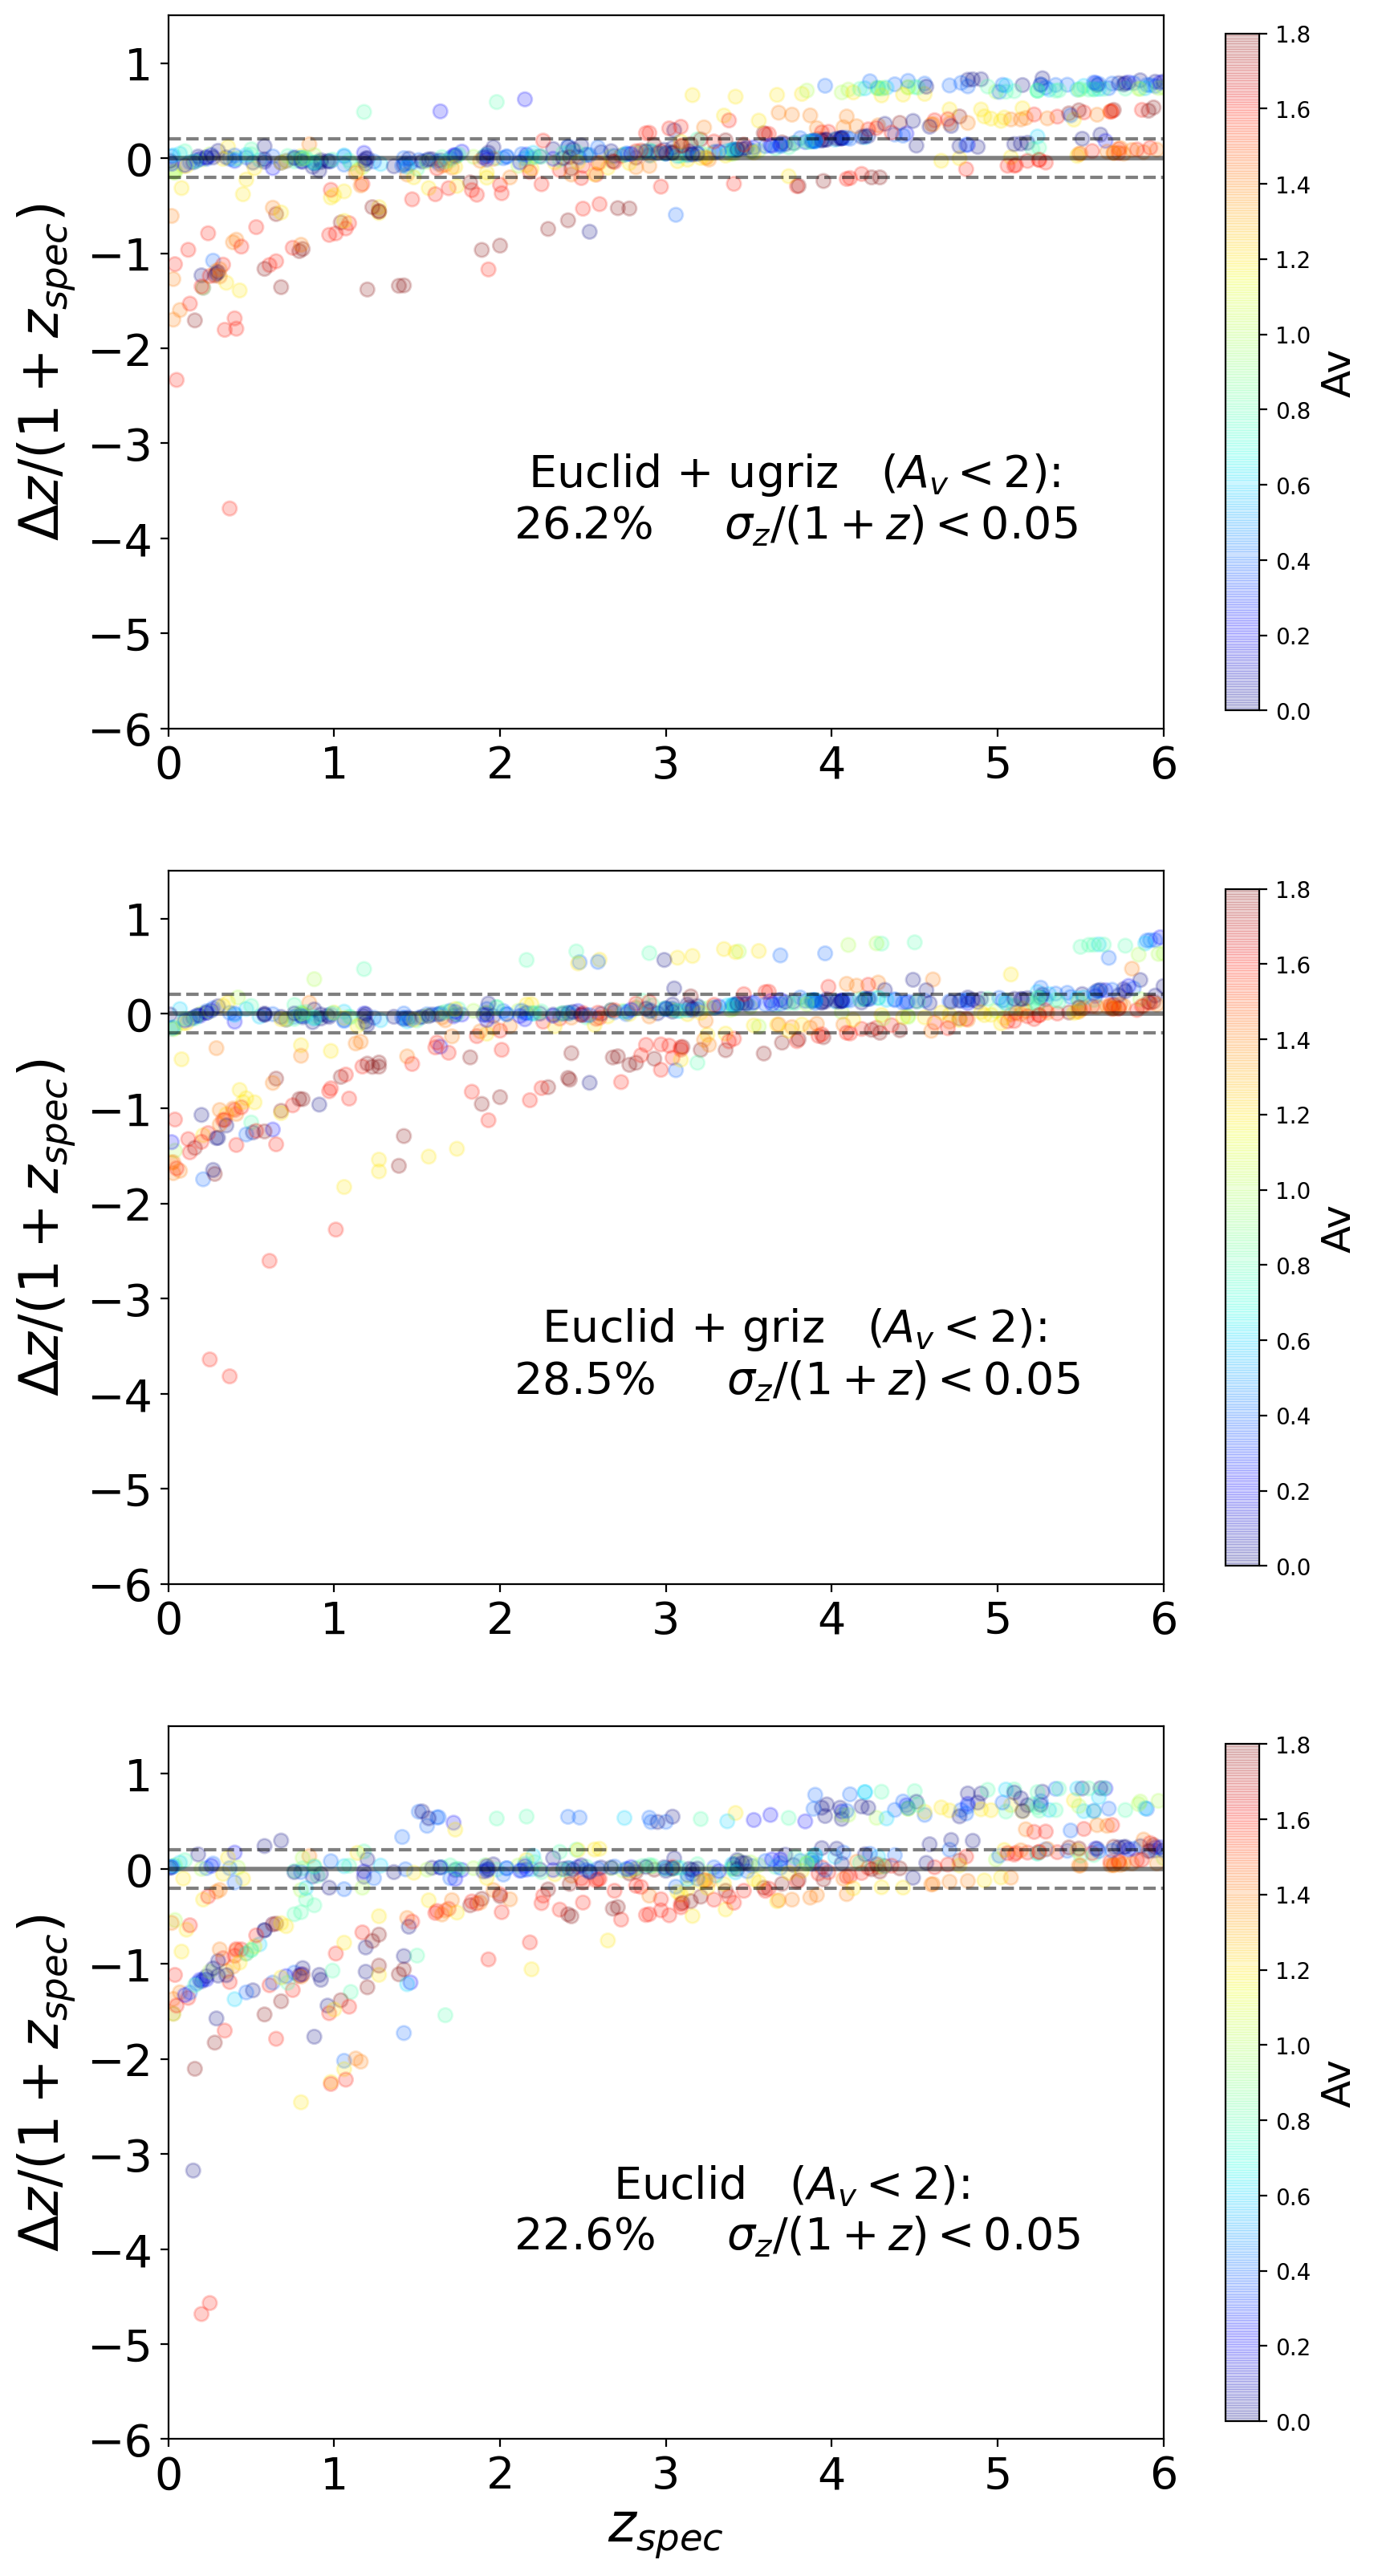

In [134]:
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.scatter(no_av_df['z'], data_all, s=40,
            c=no_av_df['Av'],
            alpha=0.2, label='Ground-based + Euclid',
            cmap='jet'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(2, -4, '  Euclid + ugriz   ($A_v < 2$):\n 26.2%     $\sigma_z/(1 + z) < 0.05$', c='k', fontsize=20)
#plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

plt.subplot(312)

plt.scatter(no_av_df_gr['z'], data_gr, s=40,
            c=no_av_df_gr['Av'],
            alpha=0.2, label='Ground-based + Euclid',
            cmap='jet'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(2, -4, '   Euclid + griz   ($A_v < 2$):\n 28.5%     $\sigma_z/(1 + z) < 0.05$', c='k', fontsize=20)

#plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)


plt.subplot(313)

plt.scatter(no_av_df_euc['z'], data_euc, s=40,
            c=no_av_df_euc['Av'],
            alpha=0.2, label='Ground-based + Euclid',
            cmap='jet'
           )

plt.plot([0, 6], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 6], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 6], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(2, -4, '        Euclid   ($A_v < 2$):\n 22.6%     $\sigma_z/(1 + z) < 0.05$', c='k', fontsize=20)
plt.xlabel('$z_{spec}$', fontsize=24)
plt.ylabel(r'$\Delta z/(1 + z_{spec})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(-6, 1.5)
plt.xlim(0, 6)

#plt.savefig('new_model_figs/photoz_AvCUT_alt.png', transparent=False, dpi=200, format='png')

In [123]:
data_all = (no_av_df['z']-no_av_all[:, 1])/(1+no_av_df['z'])

In [124]:
data_gr = (no_av_df_gr['z'] - no_av_gr[:,1])/(1+no_av_df_gr['z'])

In [125]:
data_euc = (no_av_df_euc['z']-no_av_euc[:, 1])/(1+no_av_df_euc['z'])

In [126]:
print(np.mean(data_all), np.mean(data_gr), np.mean(data_euc))

0.035750297012479795 -0.12011244396114758 -0.13714508566940897


In [127]:
std_all = np.sqrt(np.sum((no_av_df['z'] - np.mean(data_gr))**2)/619)/(no_av_df['z']+1)
std_all

565513     0.518943
1257961    2.078862
1231130    0.914264
411827     1.443177
1244073    3.390765
             ...   
1255948    0.624774
1319937    1.449165
1396163    2.494634
77610      1.929552
180297     0.500356
Name: z, Length: 619, dtype: float64

(-6.0, 1.0)

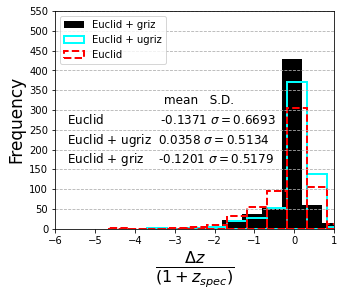

In [244]:
plt.figure(figsize=(5, 4))
plt.hist(data_gr, bins=np.arange(min(data_gr), max(data_gr) + 0.5, 0.5), fc='k', label='Euclid + griz')

plt.hist(data_all,bins=np.arange(min(data_all), max(data_all) + 0.5, 0.5), fill=False, edgecolor='cyan', lw=2, label='Euclid + ugriz')

plt.hist(data_euc, bins=np.arange(min(data_euc), max(data_euc) + 0.5, 0.5), ls='--', fill=False, edgecolor='r', lw=2, label='Euclid')

plt.yticks(np.arange(0, 600, step=50))
plt.grid(axis='y', ls='--')
plt.legend()
plt.ylabel('Frequency', fontsize=17)
plt.xlabel(r'$\frac{\Delta z}{(1 + z_{spec})}$', fontsize=23)


plt.text(-5.7, 315, ('                         mean   S.D.'), c='k', fontsize=12)


plt.text(-5.7, 165, (r'Euclid + griz    %.4f $\sigma = %.4f$' % (np.mean(data_gr), sd_gr_del)), c='k', fontsize=12)
plt.text(-5.7, 265, (r'Euclid               %.4f $\sigma = %.4f$' % (np.mean(data_euc), sd_euc_del)), c='k', fontsize=12)
plt.text(-5.7, 215, (r'Euclid + ugriz  %.4f $\sigma = %.4f$' % (np.mean(data_all), sd_all_del)), c='k', fontsize=12)

plt.xlim(-6, 1)
#plt.savefig('new_model_figs/hist_dz_z_AVCUT_zle2.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=1)

(array([1010.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           3.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

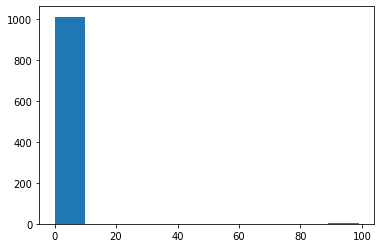

In [136]:
plt.hist(all_zphot[:, 1])

# all phot

In [93]:
no_outliers_all = all_zphot[(all_zphot[:, 1] < 6.1)]

In [94]:
no_outliers_all

array([[0.00000e+00, 2.36000e+00, 8.09980e+01, ..., 1.00000e+00,
        5.50000e+00, 0.00000e+00],
       [1.00000e+00, 5.36000e+00, 3.00351e+02, ..., 1.00000e+00,
        2.42000e+00, 0.00000e+00],
       [2.00000e+00, 7.60000e-01, 5.46000e-01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.01000e+03, 3.60000e-01, 7.28000e-01, ..., 1.00000e+00,
        2.00000e+00, 0.00000e+00],
       [1.01100e+03, 8.20000e-01, 7.54000e-01, ..., 1.00000e+00,
        0.00000e+00, 1.31000e+01],
       [1.01200e+03, 4.20000e-01, 3.04110e+01, ..., 1.00000e+00,
        4.02000e+00, 0.00000e+00]])

In [95]:
no_outliers_df = df.take(no_outliers_all[:, 0])
no_outliers_df

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
280716   0.49  3.000  0.5897  33.4474  28.8046  26.6278  24.6965  45.1824   
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
275850   5.92  0.200  0.7505  57.3560  49.6766  47.9754  44.8024  80.1492   
...       ...    ...     ...      ...      ...      ...      ...      ...   
752537   0.85  0.020  0.8755  45.0246  33.6142  32.7994  28.4702  63.7251   
1319937  1.41  4.000  0.5726  28.0117  25.9348  25.1575  24.5303  28.9570   
1396163  0.40  3.000  0.5897  21.9004  20.9667  20.5987  20.2985  24.4159   
77610    0.81  0.005  0.9508  22.0708  21.2049  20.8989  20.6457  23.6721   
180297   5.98  0.300  0.7305  25.5807  24.9401  24.9158  24.9938  28.3799   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
280716   40.7217  36.3800  ...   23.5277    23.5407  1.000000e+10  0.0  1.0   
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
275850   73.5150  65.4574  ...   42.4660    42.4892  1.000000e+10  0.0  1.0   
...          ...      ...  ...       ...        ...           ...  ...  ...   
752537   56.5050  50.6993  ...   26.1197    26.1435  1.000000e+10  0.3  1.0   
1319937  28.6805  28.5041  ...   24.0263    24.0343  1.000000e+10  0.3  1.0   
1396163  23.5502  22.2619  ...   20.0960    20.1023  1.000000e+10 -0.3  1.0   
77610    23.0404  22.4466  ...   20.5561    20.5571  1.000000e+10  0.0  1.0   
180297   27.6446  26.3651  ...   25.0037    25.0035  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
280716       1.0     1.0  2.0   5.106113      True  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
275850       1.0     1.0  2.0  12.828409      True  
...          ...     ...  ...        ...       ...  
752537       3.0     1.0  2.8   7.255357      True  
1319937      1.0     1.0  0.4   9.269044      True  
1396163      1.0     1.0  0.4   4.401514      True  
77610        3.0     1.0  1.0   7.059386      True  
180297       3.0     1.0  0.2  12.840598      True  

[1010 rows x 48 columns]

In [96]:
no_av_all = no_outliers_all[no_outliers_df['Av']<2.]

In [97]:
no_av_df = no_outliers_df[no_outliers_df['Av'] < 2.]
no_av_df

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
411827   1.42  0.500  0.7049  37.3080  32.4057  30.3707  28.0384  44.9282   
1244073  0.03  6.000  0.5797  19.3051  17.1565  16.3323  15.5897  24.9168   
...       ...    ...     ...      ...      ...      ...      ...      ...   
1255948  4.59  0.100  0.7879  22.6824  22.8114  22.9550  23.1418  24.9761   
1319937  1.41  4.000  0.5726  28.0117  25.9348  25.1575  24.5303  28.9570   
1396163  0.40  3.000  0.5897  21.9004  20.9667  20.5987  20.2985  24.4159   
77610    0.81  0.005  0.9508  22.0708  21.2049  20.8989  20.6457  23.6721   
180297   5.98  0.300  0.7305  25.5807  24.9401  24.9158  24.9938  28.3799   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
411827   41.8843  39.3733  ...   26.5098    26.5289  1.000000e+10 -0.3  1.0   
1244073  22.2003  20.3292  ...   15.3595    15.3632  1.000000e+10  0.0  1.0   
...          ...      ...  ...       ...        ...           ...  ...  ...   
1255948  24.0161  22.6910  ...   22.9648    22.9787  1.000000e+10 -0.3  1.0   
1319937  28.6805  28.5041  ...   24.0263    24.0343  1.000000e+10  0.3  1.0   
1396163  23.5502  22.2619  ...   20.0960    20.1023  1.000000e+10 -0.3  1.0   
77610    23.0404  22.4466  ...   20.5561    20.5571  1.000000e+10  0.0  1.0   
180297   27.6446  26.3651  ...   25.0037    25.0035  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
411827       3.0     1.0  1.8   9.295631      True  
1244073     10.0     1.0  1.4   0.422245      True  
...          ...     ...  ...        ...       ...  
1255948      1.0     0.0  0.0  12.471455      True  
1319937      1.0     1.0  0.4   9.269044      True  
1396163      1.0     1.0  0.4   4.401514      True  
77610        3.0     1.0  1.0   7.059386      True  
180297       3.0     1.0  0.2  12.840598      True  

[619 rows x 48 columns]

In [98]:
z_del_all = (no_av_df['z'] - no_av_all[:, 1])/(no_av_df['z']+1)

In [99]:
mean_z_del_all = (sum(z_del_all))/619

In [100]:
sd_all_del = np.sqrt(sum((z_del_all-mean_z_del_all)**2)/619)

# griz phot

In [101]:
no_outliers_gr = grizVisYJH_zphot[(grizVisYJH_zphot[:, 1] < 6.1)]

In [102]:
no_outliers_gr

array([[0.00000e+00, 5.58000e+00, 7.75780e+01, ..., 1.00000e+00,
        2.64000e+00, 0.00000e+00],
       [1.00000e+00, 5.36000e+00, 2.41374e+02, ..., 1.00000e+00,
        4.18000e+00, 0.00000e+00],
       [2.00000e+00, 7.40000e-01, 3.02000e-01, ..., 1.00000e+00,
        0.00000e+00, 8.74000e+00],
       ...,
       [1.01000e+03, 4.00000e-01, 3.82000e-01, ..., 1.00000e+00,
        3.04000e+00, 1.20800e+01],
       [1.01100e+03, 8.20000e-01, 9.55000e-01, ..., 1.00000e+00,
        0.00000e+00, 2.92900e+01],
       [1.01200e+03, 3.80000e-01, 2.29950e+01, ..., 1.00000e+00,
        3.38000e+00, 0.00000e+00]])

In [103]:
no_outliers_df = df.take(no_outliers_gr[:, 0])

In [104]:
no_av_gr = no_outliers_gr[no_outliers_df['Av']<2., :]

In [105]:
no_av_gr.shape

(619, 21)

In [106]:
no_av_df_gr = no_outliers_df[no_outliers_df['Av'] < 2.]
no_av_df_gr

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
411827   1.42  0.500  0.7049  37.3080  32.4057  30.3707  28.0384  44.9282   
1244073  0.03  6.000  0.5797  19.3051  17.1565  16.3323  15.5897  24.9168   
...       ...    ...     ...      ...      ...      ...      ...      ...   
1255948  4.59  0.100  0.7879  22.6824  22.8114  22.9550  23.1418  24.9761   
1319937  1.41  4.000  0.5726  28.0117  25.9348  25.1575  24.5303  28.9570   
1396163  0.40  3.000  0.5897  21.9004  20.9667  20.5987  20.2985  24.4159   
77610    0.81  0.005  0.9508  22.0708  21.2049  20.8989  20.6457  23.6721   
180297   5.98  0.300  0.7305  25.5807  24.9401  24.9158  24.9938  28.3799   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
411827   41.8843  39.3733  ...   26.5098    26.5289  1.000000e+10 -0.3  1.0   
1244073  22.2003  20.3292  ...   15.3595    15.3632  1.000000e+10  0.0  1.0   
...          ...      ...  ...       ...        ...           ...  ...  ...   
1255948  24.0161  22.6910  ...   22.9648    22.9787  1.000000e+10 -0.3  1.0   
1319937  28.6805  28.5041  ...   24.0263    24.0343  1.000000e+10  0.3  1.0   
1396163  23.5502  22.2619  ...   20.0960    20.1023  1.000000e+10 -0.3  1.0   
77610    23.0404  22.4466  ...   20.5561    20.5571  1.000000e+10  0.0  1.0   
180297   27.6446  26.3651  ...   25.0037    25.0035  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
411827       3.0     1.0  1.8   9.295631      True  
1244073     10.0     1.0  1.4   0.422245      True  
...          ...     ...  ...        ...       ...  
1255948      1.0     0.0  0.0  12.471455      True  
1319937      1.0     1.0  0.4   9.269044      True  
1396163      1.0     1.0  0.4   4.401514      True  
77610        3.0     1.0  1.0   7.059386      True  
180297       3.0     1.0  0.2  12.840598      True  

[619 rows x 48 columns]

In [107]:
z_del_gr = (no_av_df_gr['z'] - no_av_gr[:, 1])/(no_av_df_gr['z']+1)

In [108]:
mean_z_del_gr = (sum(z_del_gr))/619

In [109]:
sd_gr_del = np.sqrt(sum((z_del_gr-mean_z_del_gr)**2)/619)

# euc

In [110]:
no_outliers_euc = VisYJH_zphot[(VisYJH_zphot[:, 1] < 6.1)]

In [111]:
no_outliers_euc

array([[0.000e+00, 2.400e+00, 3.200e-02, ..., 1.000e+00, 3.800e+00,
        9.881e+01],
       [1.000e+00, 5.180e+00, 2.260e-01, ..., 1.000e+00, 3.940e+00,
        7.945e+01],
       [2.000e+00, 1.800e-01, 0.000e+00, ..., 1.000e+00, 6.200e-01,
        9.978e+01],
       ...,
       [1.010e+03, 6.000e-01, 4.000e-03, ..., 1.000e+00, 2.000e-01,
        9.991e+01],
       [1.011e+03, 6.000e-01, 4.000e-03, ..., 1.000e+00, 1.800e-01,
        9.994e+01],
       [1.012e+03, 4.400e+00, 6.000e-03, ..., 1.000e+00, 1.460e+00,
        9.722e+01]])

In [112]:
no_outliers_df = df.take(no_outliers_euc[:, 0])

In [113]:
no_av_euc = no_outliers_euc[no_outliers_df['Av']<2.]

In [114]:
no_av_df_euc = no_outliers_df[no_outliers_df['Av'] < 2.]
no_av_df_euc

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
411827   1.42  0.500  0.7049  37.3080  32.4057  30.3707  28.0384  44.9282   
1244073  0.03  6.000  0.5797  19.3051  17.1565  16.3323  15.5897  24.9168   
...       ...    ...     ...      ...      ...      ...      ...      ...   
1255948  4.59  0.100  0.7879  22.6824  22.8114  22.9550  23.1418  24.9761   
1319937  1.41  4.000  0.5726  28.0117  25.9348  25.1575  24.5303  28.9570   
1396163  0.40  3.000  0.5897  21.9004  20.9667  20.5987  20.2985  24.4159   
77610    0.81  0.005  0.9508  22.0708  21.2049  20.8989  20.6457  23.6721   
180297   5.98  0.300  0.7305  25.5807  24.9401  24.9158  24.9938  28.3799   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
411827   41.8843  39.3733  ...   26.5098    26.5289  1.000000e+10 -0.3  1.0   
1244073  22.2003  20.3292  ...   15.3595    15.3632  1.000000e+10  0.0  1.0   
...          ...      ...  ...       ...        ...           ...  ...  ...   
1255948  24.0161  22.6910  ...   22.9648    22.9787  1.000000e+10 -0.3  1.0   
1319937  28.6805  28.5041  ...   24.0263    24.0343  1.000000e+10  0.3  1.0   
1396163  23.5502  22.2619  ...   20.0960    20.1023  1.000000e+10 -0.3  1.0   
77610    23.0404  22.4466  ...   20.5561    20.5571  1.000000e+10  0.0  1.0   
180297   27.6446  26.3651  ...   25.0037    25.0035  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
411827       3.0     1.0  1.8   9.295631      True  
1244073     10.0     1.0  1.4   0.422245      True  
...          ...     ...  ...        ...       ...  
1255948      1.0     0.0  0.0  12.471455      True  
1319937      1.0     1.0  0.4   9.269044      True  
1396163      1.0     1.0  0.4   4.401514      True  
77610        3.0     1.0  1.0   7.059386      True  
180297       3.0     1.0  0.2  12.840598      True  

[619 rows x 48 columns]

In [115]:
z_del_euc = (no_av_df_euc['z'] - no_av_euc[:, 1])/(no_av_df_euc['z']+1)

In [116]:
mean_z_del_euc = (sum(z_del_euc))/619

In [117]:
sd_euc_del = np.sqrt(sum((z_del_euc-mean_z_del_euc)**2)/619)

In [118]:
print(sd_gr_del, mean_z_del_gr)
print(sd_all_del, mean_z_del_all)
print(sd_euc_del, mean_z_del_euc)

0.5179246476829716 -0.12011244396114744
0.5134045275878911 0.03575029701247978
0.6692581194661621 -0.13714508566940894


In [119]:
print(sd_grizVisYJH_del, sd_Euc_del, sd_all_del)# in delz/z+1 !!!

NameError: name 'sd_grizVisYJH_del' is not defined

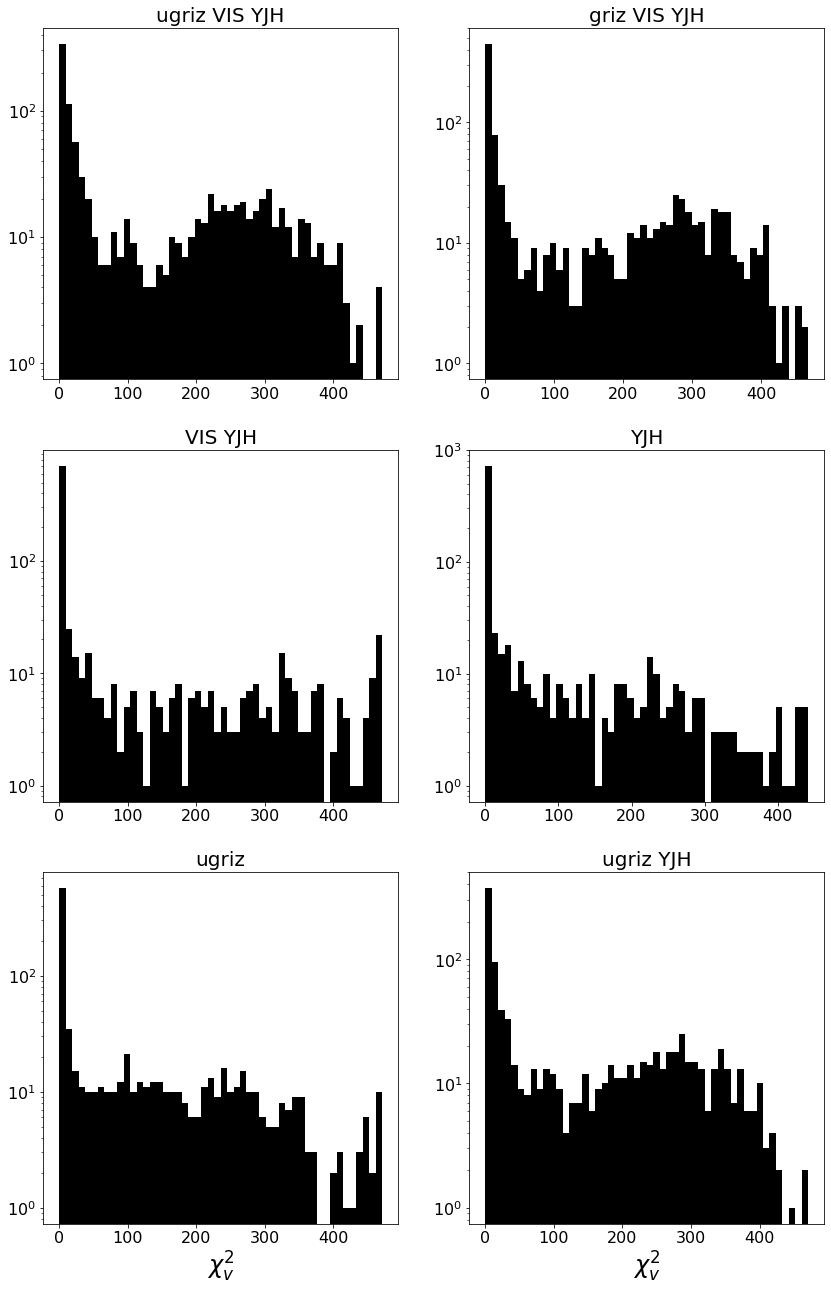

In [71]:
plt.figure(figsize= (14, 22))
plt.subplot(321)


plt.hist(all_zphot[:, 2], bins=50, log=True, color='k')
#plt.xlabel('$\chi^2_v$', fontsize=24)
#plt.ylabel(r'$\frac{\Delta z}{z}$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('ugriz VIS YJH', fontsize=20)

plt.subplot(322)

plt.hist(grizVisYJH_zphot[:, 2], bins=50, log=True, color='k')
#plt.xlabel('$\chi^2_v$', fontsize=24)
#plt.ylabel(r'$\frac{\Delta z}{z}$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('griz VIS YJH', fontsize=20)

plt.subplot(323)

plt.hist(VisYJH_zphot[:, 2], bins=50, log=True, color='k')
#plt.xlabel('$\chi^2_v$', fontsize=24)
#plt.ylabel(r'$\frac{\Delta z}{z}$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('VIS YJH', fontsize=20)

plt.subplot(324)

plt.hist(YJH_zphot[:, 2], bins=50, log=True, color='k')
#plt.xlabel('$\chi^2_v$', fontsize=24)
#plt.ylabel(r'$\frac{\Delta z}{z}$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('YJH', fontsize=20)


plt.subplot(325)

plt.hist(ugriz_zphot[:, 2], bins=50, log=True, color='k')
plt.xlabel('$\chi^2_v$', fontsize=24)
#plt.ylabel(r'$\frac{\Delta z}{z}$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('ugriz', fontsize=20)


plt.subplot(326)

plt.hist(ugrizYJH_zphot[:, 2], bins=50, log=True, color='k')
plt.xlabel('$\chi^2_v$', fontsize=24)
#plt.ylabel(r'$\frac{\Delta z}{z}$', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('ugriz YJH', fontsize=20)


#plt.savefig('new_model_figs/chi2.png', dpi=250, transparent=False, format='png')

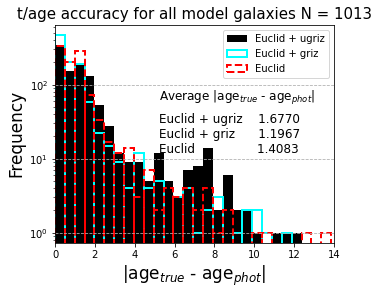

In [560]:
plt.figure(figsize=(5, 4))

plt.hist(abs(df['t/Gyr'] - all_zphot[:, 6]), bins=200, log=True, color='k', label='Euclid + ugriz')
plt.hist(abs(df['t/Gyr'] - grizVisYJH_zphot[:, 6]), bins=200, log=True, fill=False, edgecolor='cyan', lw=2, label='Euclid + griz')
plt.hist(abs(df['t/Gyr'] - VisYJH_zphot[:, 6]), bins=200, log=True, ls='--', fill=False, edgecolor='r', lw=2, label='Euclid')

plt.grid(axis='y', ls='--')
plt.legend()
plt.ylabel('Frequency', fontsize=17)
plt.xlabel(r'|age$_{true}$ - age$_{phot}$|', fontsize=17)


plt.text(5.2, 60, ('Average |age$_{true}$ - age$_{phot}$|'), c='k', fontsize=12)

plt.text(5.2, 19, (r'Euclid + griz      %.4f' % (sum(abs(df['t/Gyr'] - grizVisYJH_zphot[:, 6]))/1013)), c='k', fontsize=12)

plt.text(5.2, 12, (r'Euclid                %.4f' % (sum(abs(df['t/Gyr'] - VisYJH_zphot[:, 6]))/1013)), c='k', fontsize=12)

plt.text(5.2, 30, (r'Euclid + ugriz    %.4f' % (sum(abs(df['t/Gyr'] - all_zphot[:, 6]))/1013)), c='k', fontsize=12)

plt.title('t/age accuracy for all model galaxies N = 1013', fontsize=15)

plt.xlim(0, 14)

#plt.savefig('new_model_figs/age_hist.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=1)

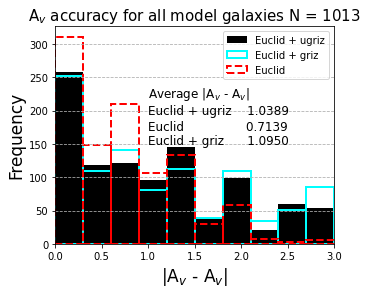

In [575]:
plt.figure(figsize=(5, 4))

plt.hist(abs(df['Av'] - all_zphot[:, 7]), color='k', label='Euclid + ugriz')

plt.hist(abs(df['Av'] - grizVisYJH_zphot[:, 7]),fill=False, edgecolor='cyan', lw=2, label='Euclid + griz')

plt.hist(abs(df['Av'] - VisYJH_zphot[:, 7]), ls='--', fill=False, edgecolor='r', lw=2, label='Euclid')

plt.grid(axis='y', ls='--')
plt.legend()
plt.ylabel('Frequency', fontsize=17)
plt.xlabel(r'|A$_v$ - A$_v$|', fontsize=17)


plt.text(1, 220, ('Average |A$_v$ - A$_v$|'), c='k', fontsize=12)

plt.text(1, 150, (r'Euclid + griz      %.4f' % (sum(abs(df['Av'] - grizVisYJH_zphot[:, 7]))/1013)), c='k', fontsize=12)

plt.text(1, 170, (r'Euclid                %.4f' % (sum(abs(df['Av'] - VisYJH_zphot[:, 7]))/1013)), c='k', fontsize=12)

plt.text(1, 195, (r'Euclid + ugriz    %.4f' % (sum(abs(df['Av'] - all_zphot[:, 7]))/1013)), c='k', fontsize=12)

plt.title('A$_v$ accuracy for all model galaxies N = 1013', fontsize=15)

plt.xlim(0, 3)

#plt.savefig('new_model_figs/Av_hist.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=1)

In [261]:
delz_all = no_av_df['z'] - no_av_all[:,1]
mean_delz_all = np.mean(delz_all)

stdblah_all = np.sqrt(np.sum((delz_all - mean_delz_all)**2)/619)

print(delz_all, mean_delz_all, stdblah_all)

565513     0.37
1257961   -0.08
1231130   -0.36
411827    -3.24
1244073   -1.31
           ... 
1255948    1.85
1319937   -0.19
1396163    0.04
77610     -0.01
180297     5.56
Name: z, Length: 619, dtype: float64 0.7525686591276253 1.890761493145343


In [260]:
delz_euc = no_av_df_euc['z'] - no_av_euc[:,1]
mean_delz_euc= np.mean(delz_euc)

stdblah_euc = np.sqrt(np.sum((delz_euc - mean_delz_euc)**2)/619)

print(delz_euc, mean_delz_euc, stdblah_euc)

565513     0.55
1257961    0.50
1231130    0.00
411827    -2.56
1244073   -1.57
           ... 
1255948    1.45
1319937    0.81
1396163   -0.20
77610      0.21
180297     1.58
Name: z, Length: 619, dtype: float64 0.24061389337641356 1.9730297698951722


In [259]:
delz_gr = no_av_df_gr['z'] - no_av_gr[:,1]
mean_delz_gr = np.mean(delz_gr)

stdblah_gr = np.sqrt(np.sum((delz_gr - mean_delz_gr)**2)/619)

print(delz_gr, mean_delz_gr, stdblah_gr)

565513     0.37
1257961   -0.06
1231130    0.24
411827    -3.12
1244073   -1.61
           ... 
1255948    0.61
1319937   -0.11
1396163    0.00
77610     -0.01
180297     5.60
Name: z, Length: 619, dtype: float64 0.029466882067851387 1.395281411254742


In [297]:
arr_delz_gr = np.array(delz_gr)
arr_delz_gr.shape

(619,)

In [311]:
data = arr_delz_gr[np.logical_not(arr_delz_gr > 0.05)]
print(data)
data = data[np.logical_not(data < -0.05)]
print(data.shape)

[-0.06 -3.12 -1.61 -2.69  0.   -0.11 -0.95 -0.19 -1.61 -1.23 -0.05 -0.16
  0.03 -1.21 -0.01 -1.5  -0.78 -0.54 -0.6  -0.03 -0.16 -0.01 -0.03 -1.98
 -0.14 -1.87 -0.02 -0.08 -0.11 -0.18 -1.69  0.03  0.01  0.03 -1.56 -0.08
 -1.39 -0.12 -2.11 -1.43 -1.42 -1.99  0.   -0.05 -0.06 -0.17 -2.55 -1.44
 -0.16 -1.73 -0.03 -0.31 -0.06 -0.2  -1.39  0.01 -1.48 -1.68  0.    0.02
 -0.11 -0.01 -5.23 -1.93 -0.03 -0.14 -1.5  -0.4  -0.01 -1.28 -0.16 -0.08
 -0.16 -1.89 -0.52 -2.16 -1.77 -1.49 -0.05 -0.02  0.04  0.02 -0.08 -1.71
 -0.48 -4.55  0.01  0.02  0.01 -0.14 -0.03  0.   -1.72 -0.47  0.05 -0.17
 -0.06 -0.1  -0.38 -0.07 -1.1   0.01 -0.54 -1.29  0.05 -1.64 -0.18 -2.17
 -0.92  0.   -1.55 -0.03 -1.31 -0.92 -0.44 -0.02 -0.03 -0.07 -0.04 -0.28
  0.01 -4.57 -3.77 -0.1  -3.29  0.   -1.28 -1.67 -0.68 -1.42 -1.36  0.02
 -0.15 -0.02 -0.11 -0.02 -1.07 -1.07 -0.05 -0.16 -0.33 -3.87 -0.28 -0.45
 -1.11 -0.11 -0.07  0.01 -1.49 -1.63  0.02 -1.42 -1.17 -0.68 -0.1  -4.19
 -1.62 -0.84  0.04 -0.08 -2.04 -0.01 -0.06 -2.31 -1

In [312]:
(81/619)*100

13.08562197092084

# w/0 cut

In [263]:
delz_all2 = df['z'] - all_zphot[:,1]
mean_delz_all2 = np.mean(delz_all2)

stdblah_all2 = np.sqrt(np.sum((delz_all2 - mean_delz_all2)**2)/1013)

print(delz_all2, mean_delz_all2, stdblah_all2)

280716    -1.87
565513     0.37
1257961   -0.08
1231130   -0.36
275850     3.54
           ... 
752537    -1.47
1319937   -0.19
1396163    0.04
77610     -0.01
180297     5.56
Name: z, Length: 1013, dtype: float64 -0.136969397828233 5.793785041717219


In [267]:
delz_gr2 = df['z'] - grizVisYJH_zphot[:,1]
mean_delz_gr2 = np.mean(delz_gr2)

stdblah_gr2 = np.sqrt(np.sum((delz_gr2 - mean_delz_gr2)**2)/1013)

print(delz_gr2, mean_delz_gr2, stdblah_gr2)

280716    -5.09
565513     0.37
1257961   -0.06
1231130    0.24
275850     0.84
           ... 
752537    -4.29
1319937   -0.11
1396163    0.00
77610     -0.01
180297     5.60
Name: z, Length: 1013, dtype: float64 -1.0352319842053308 5.691837375164072


In [268]:
delz_euc2 = df['z'] - VisYJH_zphot[:,1]
mean_delz_euc2= np.mean(delz_euc2)

stdblah_euc2 = np.sqrt(np.sum((delz_euc2 - mean_delz_euc2)**2)/1013)

print(delz_euc2, mean_delz_euc2, stdblah_euc2)

280716    -1.91
565513     0.55
1257961    0.50
1231130    0.00
275850     1.36
           ... 
752537    -3.33
1319937    0.81
1396163   -0.20
77610      0.21
180297     1.58
Name: z, Length: 1013, dtype: float64 -0.8754886475814414 5.762088805878529


In [315]:
no_outliers_all = all_zphot[(all_zphot[:, 1] < 6.1)]

In [316]:
no_outliers_all

array([[0.00000e+00, 2.36000e+00, 8.09980e+01, ..., 1.00000e+00,
        5.50000e+00, 0.00000e+00],
       [1.00000e+00, 5.36000e+00, 3.00351e+02, ..., 1.00000e+00,
        2.42000e+00, 0.00000e+00],
       [2.00000e+00, 7.60000e-01, 5.46000e-01, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.01000e+03, 3.60000e-01, 7.28000e-01, ..., 1.00000e+00,
        2.00000e+00, 0.00000e+00],
       [1.01100e+03, 8.20000e-01, 7.54000e-01, ..., 1.00000e+00,
        0.00000e+00, 1.31000e+01],
       [1.01200e+03, 4.20000e-01, 3.04110e+01, ..., 1.00000e+00,
        4.02000e+00, 0.00000e+00]])

In [317]:
no_outliers_df = df.take(no_outliers_all[:, 0])
no_outliers_df

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
280716   0.49  3.000  0.5897  33.4474  28.8046  26.6278  24.6965  45.1824   
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
275850   5.92  0.200  0.7505  57.3560  49.6766  47.9754  44.8024  80.1492   
...       ...    ...     ...      ...      ...      ...      ...      ...   
752537   0.85  0.020  0.8755  45.0246  33.6142  32.7994  28.4702  63.7251   
1319937  1.41  4.000  0.5726  28.0117  25.9348  25.1575  24.5303  28.9570   
1396163  0.40  3.000  0.5897  21.9004  20.9667  20.5987  20.2985  24.4159   
77610    0.81  0.005  0.9508  22.0708  21.2049  20.8989  20.6457  23.6721   
180297   5.98  0.300  0.7305  25.5807  24.9401  24.9158  24.9938  28.3799   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
280716   40.7217  36.3800  ...   23.5277    23.5407  1.000000e+10  0.0  1.0   
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
275850   73.5150  65.4574  ...   42.4660    42.4892  1.000000e+10  0.0  1.0   
...          ...      ...  ...       ...        ...           ...  ...  ...   
752537   56.5050  50.6993  ...   26.1197    26.1435  1.000000e+10  0.3  1.0   
1319937  28.6805  28.5041  ...   24.0263    24.0343  1.000000e+10  0.3  1.0   
1396163  23.5502  22.2619  ...   20.0960    20.1023  1.000000e+10 -0.3  1.0   
77610    23.0404  22.4466  ...   20.5561    20.5571  1.000000e+10  0.0  1.0   
180297   27.6446  26.3651  ...   25.0037    25.0035  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
280716       1.0     1.0  2.0   5.106113      True  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
275850       1.0     1.0  2.0  12.828409      True  
...          ...     ...  ...        ...       ...  
752537       3.0     1.0  2.8   7.255357      True  
1319937      1.0     1.0  0.4   9.269044      True  
1396163      1.0     1.0  0.4   4.401514      True  
77610        3.0     1.0  1.0   7.059386      True  
180297       3.0     1.0  0.2  12.840598      True  

[1010 rows x 48 columns]

In [342]:
mean_accuracy_all = np.mean(abs_accuracy_all)
sd_accuracy_all = np.sqrt((sum((abs_accuracy_all - mean_accuracy_all)**2))/1010)

print(mean_accuracy_all, sd_accuracy_all)

0.5007049324119709 0.7146300603988964


In [365]:
abs_accuracy_all = abs(no_outliers_all[:,1]-no_outliers_df['z'])/(1+no_outliers_df['z'])

accuracy_all = (no_outliers_df['z']-no_outliers_all[:,1])/(1+no_outliers_df['z'])

In [378]:
mean_accuracy_gr = np.mean(abs_accuracy_gr)
sd_accuracy_gr = np.sqrt((sum((abs_accuracy_gr - mean_accuracy_gr)**2))/1010)

print(mean_accuracy_gr, sd_accuracy_gr)

0.6114136605876055 0.9225338405828281


In [340]:
abs_accuracy_gr = abs(no_outliers_gr[:,1]-no_outliers_df['z'])/(1+no_outliers_df['z'])

accuracy_gr = (no_outliers_df['z']-no_outliers_gr[:,1])/(1+no_outliers_df['z'])

In [337]:
no_outliers_gr.shape
no_outliers_euc.shape

(1010, 21)

In [347]:
mean_accuracy_euc = np.mean(abs_accuracy_euc)
sd_accuracy_euc = np.sqrt((sum((abs_accuracy_euc - mean_accuracy_euc)**2))/1010)

print(mean_accuracy_euc, sd_accuracy_euc)

0.6357145044292617 0.7832595179296044


In [346]:
abs_accuracy_euc = abs(no_outliers_euc[:,1]-no_outliers_df['z'])/(1+no_outliers_df['z'])

accuracy_euc = (no_outliers_df['z']-no_outliers_euc[:,1])/(1+no_outliers_df['z'])

In [337]:
no_outliers_gr.shape
no_outliers_euc.shape

(1010, 21)

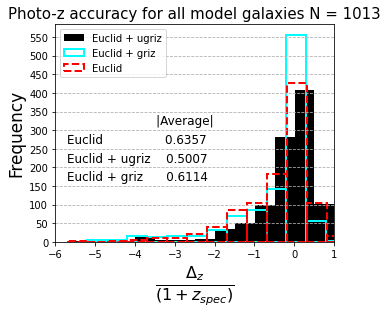

In [496]:
plt.figure(figsize=(5, 4))
plt.hist(accuracy_all, bins=np.arange(min(accuracy_all), max(accuracy_all) + 0.5, 0.5), fc='k', label='Euclid + ugriz')

plt.hist(accuracy_gr,bins=np.arange(min(accuracy_gr), max(accuracy_gr) + 0.5, 0.5), fill=False, edgecolor='cyan', lw=2, label='Euclid + griz')

plt.hist(accuracy_euc, bins=np.arange(min(accuracy_euc), max(accuracy_euc) + 0.5, 0.5), ls='--', fill=False, edgecolor='r', lw=2, label='Euclid')

plt.yticks(np.arange(0, 600, step=50))
plt.grid(axis='y', ls='--')
plt.legend()
plt.ylabel('Frequency', fontsize=17)
plt.xlabel(r'$\frac{\Delta_z}{(1 + z_{spec})}$', fontsize=23)


plt.text(-5.7, 315, ('                       |Average|'), c='k', fontsize=12)

 
plt.text(-5.7, 165, (r'Euclid + griz      %.4f' % (mean_accuracy_gr)), c='k', fontsize=12)
plt.text(-5.7, 265, (r'Euclid                %.4f' % (mean_accuracy_euc)), c='k', fontsize=12)
plt.text(-5.7, 215, (r'Euclid + ugriz    %.4f' % (mean_accuracy_all)), c='k', fontsize=12)
plt.title('Photo-z accuracy for all model galaxies N = 1013', fontsize=15)
plt.xlim(-6, 1)
#plt.savefig('new_model_figs/hist_dz_z_new_alt.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=1)

In [375]:
no_av_df_euc
#no_av_gr.shape

z  t/Gyr      M*      VIS   NISP_Y   NISP_J   NISP_H   LSST_u  \
565513   5.73  0.400  0.7116  46.8139  42.1627  40.3437  38.2620  62.4350   
1257961  0.68  0.500  0.6988  20.5910  20.2802  20.1764  20.0733  20.9472   
1231130  2.82  0.001  0.9845  32.2892  30.1105  28.9013  27.5648  39.5408   
411827   1.42  0.500  0.7049  37.3080  32.4057  30.3707  28.0384  44.9282   
1244073  0.03  6.000  0.5797  19.3051  17.1565  16.3323  15.5897  24.9168   
...       ...    ...     ...      ...      ...      ...      ...      ...   
1255948  4.59  0.100  0.7879  22.6824  22.8114  22.9550  23.1418  24.9761   
1319937  1.41  4.000  0.5726  28.0117  25.9348  25.1575  24.5303  28.9570   
1396163  0.40  3.000  0.5897  21.9004  20.9667  20.5987  20.2985  24.4159   
77610    0.81  0.005  0.9508  22.0708  21.2049  20.8989  20.6457  23.6721   
180297   5.98  0.300  0.7305  25.5807  24.9401  24.9158  24.9938  28.3799   

          LSST_g   LSST_r  ...  2MASS_Ks  wircam_Ks     M_initial    Z  SFH  \
565513   57.9110  51.8868  ...   36.6595    36.6786  1.000000e+10  0.3  1.0   
1257961  21.0557  20.8108  ...   20.0077    20.0099  1.000000e+10 -0.3  1.0   
1231130  35.2286  33.1846  ...   26.6983    26.7094  1.000000e+10  0.0  1.0   
411827   41.8843  39.3733  ...   26.5098    26.5289  1.000000e+10 -0.3  1.0   
1244073  22.2003  20.3292  ...   15.3595    15.3632  1.000000e+10  0.0  1.0   
...          ...      ...  ...       ...        ...           ...  ...  ...   
1255948  24.0161  22.6910  ...   22.9648    22.9787  1.000000e+10 -0.3  1.0   
1319937  28.6805  28.5041  ...   24.0263    24.0343  1.000000e+10  0.3  1.0   
1396163  23.5502  22.2619  ...   20.0960    20.1023  1.000000e+10 -0.3  1.0   
77610    23.0404  22.4466  ...   20.5561    20.5571  1.000000e+10  0.0  1.0   
180297   27.6446  26.3651  ...   25.0037    25.0035  1.000000e+10  0.0  1.0   

         tau/Gyr  Av_law   Av        t_l  physical  
565513       1.0     1.0  1.6  12.788015      True  
1257961      1.0     0.0  0.0   6.355619      True  
1231130     10.0     1.0  1.4  11.475679      True  
411827       3.0     1.0  1.8   9.295631      True  
1244073     10.0     1.0  1.4   0.422245      True  
...          ...     ...  ...        ...       ...  
1255948      1.0     0.0  0.0  12.471455      True  
1319937      1.0     1.0  0.4   9.269044      True  
1396163      1.0     1.0  0.4   4.401514      True  
77610        3.0     1.0  1.0   7.059386      True  
180297       3.0     1.0  0.2  12.840598      True  

[619 rows x 48 columns]

In [368]:
mean_accuracy_all_av = np.mean(abs_accuracy_all_av)
sd_accuracy_all_av = np.sqrt((sum((abs_accuracy_all_av - mean_accuracy_all_av)**2))/619)

print(mean_accuracy_all_av, sd_accuracy_all_av)

0.3297726006754799 0.39511052191501655


In [366]:
abs_accuracy_all_av = abs(no_av_all[:,1]-no_av_df['z'])/(1+no_av_df['z'])

accuracy_all_av = (no_av_df['z']-no_av_all[:,1])/(1+no_av_df['z'])

In [372]:
mean_accuracy_gr_av = np.mean(abs_accuracy_gr_av)
sd_accuracy_gr_av = np.sqrt((sum((abs_accuracy_gr_av - mean_accuracy_gr_av)**2))/619)

print(mean_accuracy_gr_av, sd_accuracy_gr_av)

0.29362768694410213 0.4432332583772414


In [371]:
abs_accuracy_gr_av = abs(no_av_gr[:,1]-no_av_df_gr['z'])/(1+no_av_df_gr['z'])

accuracy_gr_av = (no_av_df_gr['z']-no_av_gr[:,1])/(1+no_av_df_gr['z'])

In [374]:
mean_accuracy_euc_av = np.mean(abs_accuracy_euc_av)
sd_accuracy_euc_av = np.sqrt((sum((abs_accuracy_euc_av - mean_accuracy_euc_av)**2))/619)

print(mean_accuracy_euc_av, sd_accuracy_euc_av)

0.43782918891730754 0.5244242617639521


In [373]:
abs_accuracy_euc_av = abs(no_av_euc[:,1]-no_av_df_euc['z'])/(1+no_av_df_euc['z'])

accuracy_euc_av = (no_av_df_euc['z']-no_av_euc[:,1])/(1+no_av_df_euc['z'])

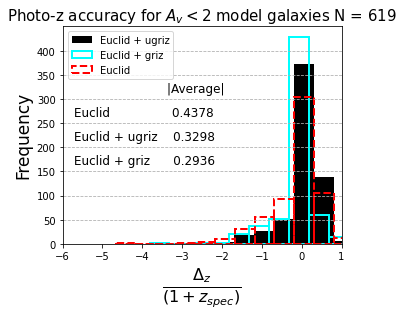

In [495]:
plt.figure(figsize=(5, 4))
plt.hist(accuracy_all_av, bins=np.arange(min(accuracy_all_av), max(accuracy_all_av) + 0.5, 0.5), fc='k', label='Euclid + ugriz')

plt.hist(accuracy_gr_av,bins=np.arange(min(accuracy_gr_av), max(accuracy_gr_av) + 0.5, 0.5), fill=False, edgecolor='cyan', lw=2, label='Euclid + griz')

plt.hist(accuracy_euc_av, bins=np.arange(min(accuracy_euc_av), max(accuracy_euc_av) + 0.5, 0.5), ls='--', fill=False, edgecolor='r', lw=2, label='Euclid')

plt.yticks(np.arange(0, 440, step=50))
plt.grid(axis='y', ls='--')
plt.legend()
plt.ylabel('Frequency', fontsize=17)
plt.xlabel(r'$\frac{\Delta_z}{(1 + z_{spec})}$', fontsize=23)


plt.text(-5.7, 315, ('                        |Average|'), c='k', fontsize=12)


plt.text(-5.7, 165, (r'Euclid + griz      %.4f' % (mean_accuracy_gr_av)), c='k', fontsize=12)
plt.text(-5.7, 265, (r'Euclid                %.4f' % (mean_accuracy_euc_av)), c='k', fontsize=12)
plt.text(-5.7, 215, (r'Euclid + ugriz    %.4f' % (mean_accuracy_all_av)), c='k', fontsize=12)
plt.title('Photo-z accuracy for $A_v < 2$ model galaxies N = 619', fontsize=15)
plt.xlim(-6, 1)
#plt.savefig('new_model_figs/hist_dz_z_new_Av_alt.png', dpi=200, transparent=False, format='png', bbox_inches='tight', pad_inches=1)

/home/chris/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/chris/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home/chris/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


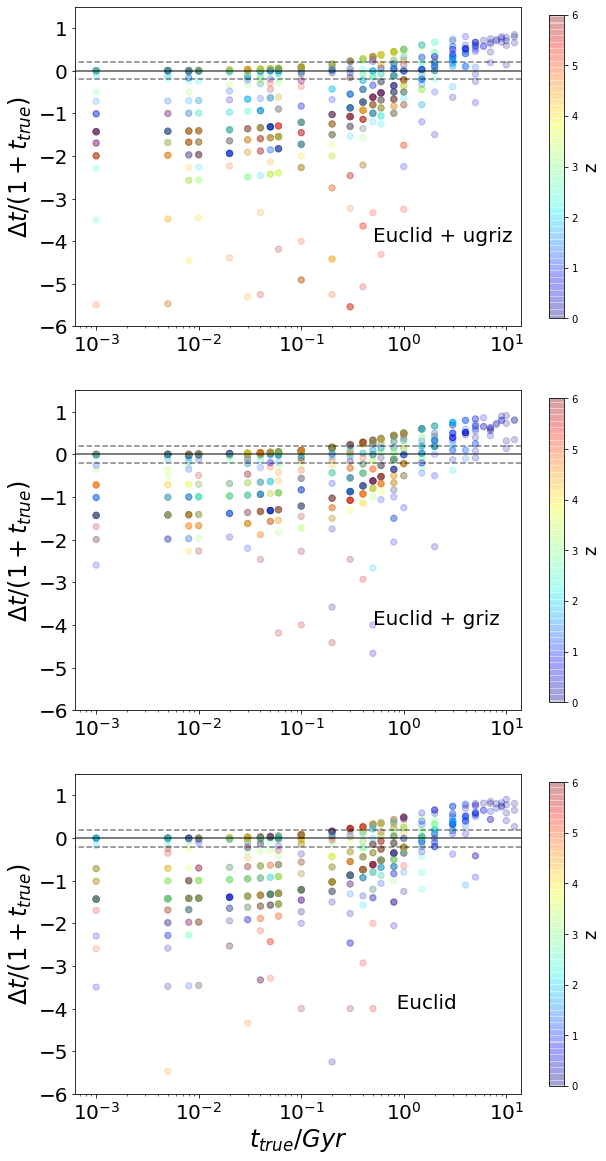

In [31]:
plt.figure(figsize=(10,20))
plt.subplot(311)
plt.scatter(df['t/Gyr'], (df['t/Gyr']-all_zphot[:, 6])/(1+df['t/Gyr']), s=40,
            c=mycolor,
            alpha=0.2,
            cmap='jet'
           )

plt.plot([0, 14], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 14], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 14], [-0.2, -0.2], c='k', alpha=0.5, ls='--')
cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(0.5, -4, 'Euclid + ugriz', c='k', fontsize=20)

#plt.xlabel('$t_{true}$', fontsize=24)
plt.ylabel(r'$\Delta t/(1 + t_{true})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.ylim(-6, 1.5)
plt.xlim(0, 14)

plt.subplot(312)

plt.scatter(df['t/Gyr'], (df['t/Gyr']-grizVisYJH_zphot[:, 6])/(1+df['t/Gyr']), s=40,
            c=mycolor,
            alpha=0.2,
            cmap='jet'
           )

plt.plot([0, 14], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 14], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 14], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(0.5, -4, 'Euclid + griz', c='k', fontsize=20)

#plt.xlabel('$t_{true}$', fontsize=24)
plt.ylabel(r'$\Delta t/(1 + t_{true})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.ylim(-6, 1.5)
plt.xlim(0, 14)


plt.subplot(313)

plt.scatter(df['t/Gyr'], (df['t/Gyr']-VisYJH_zphot[:, 6])/(1+df['t/Gyr']), s=40,
            c=mycolor,
            alpha=0.2, 
            cmap='jet'
           )

plt.plot([0, 14], [0.2, 0.2], c='k', alpha=0.5, ls='--')
plt.plot([0, 14], [0, 0], c='k', alpha=0.5, lw= 2)
plt.plot([0, 14], [-0.2, -0.2], c='k', alpha=0.5, ls='--')

cbar = plt.colorbar(shrink=0.95)
cbar.set_label(titleCmap, fontsize=18)

#plt.text(1.5, -4, ' Euclid\n$\sigma = ???$', c='r', fontsize=20)
plt.text(0.1, -4, '               Euclid ', c='k', fontsize=20)

plt.xlabel('$t_{true}/Gyr$', fontsize=24)
plt.ylabel(r'$\Delta t/(1 + t_{true})$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.ylim(-6, 1.5)
plt.xlim(0, 14)

#plt.savefig('new_model_figs/age_z.png', transparent=False, dpi=200, format='png')